In [10]:
import numpy as np
import copy
import pickle
import matplotlib.pyplot as plt
import preprocessing.GSP as GSP

plt.rcParams['figure.figsize'] = (20.0, 7.0)

In [2]:
file_location = "../data/Raman_Mouse/corrected_4_wavenumbers/"
filenames = np.load(f"{file_location}FileNames.npy")
wavenumbers = np.load(f"{file_location}Wavenumbers.npy")

data = []
for f in filenames:
    data.append(np.load(f"{file_location}{f}"))
data = np.array(data)


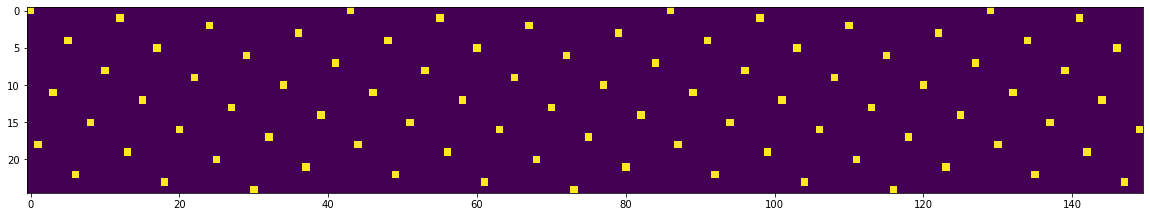

In [53]:
x = np.zeros(3750)
x[range(0, 3750, 43)] = 1
plt.imshow(x.reshape(150,25).T)

(150, 25, 1300)


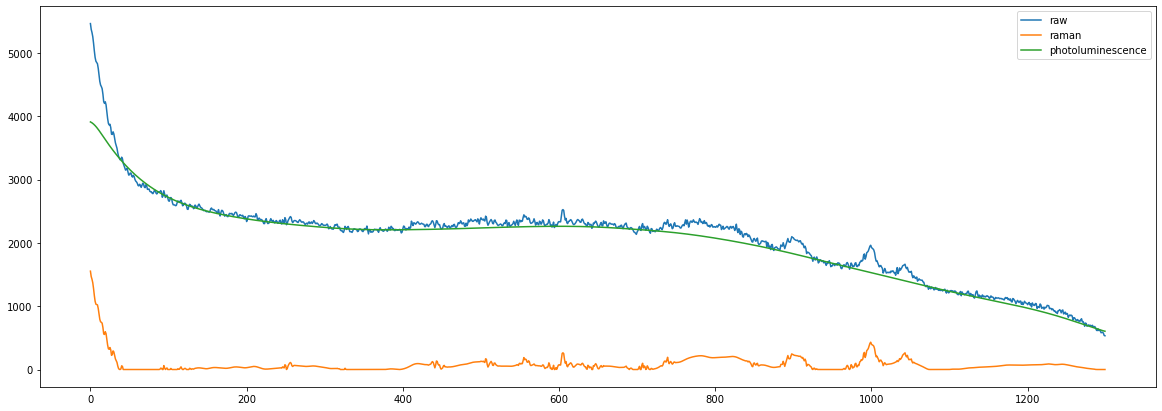

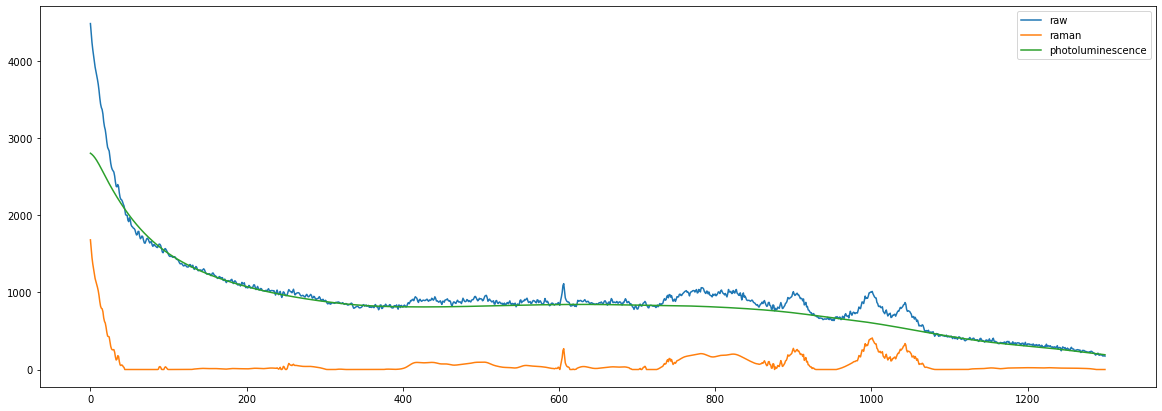

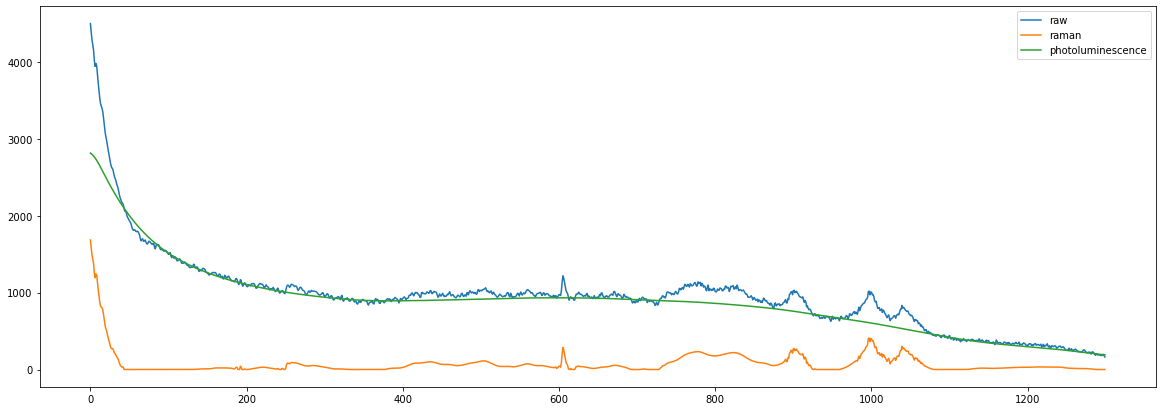

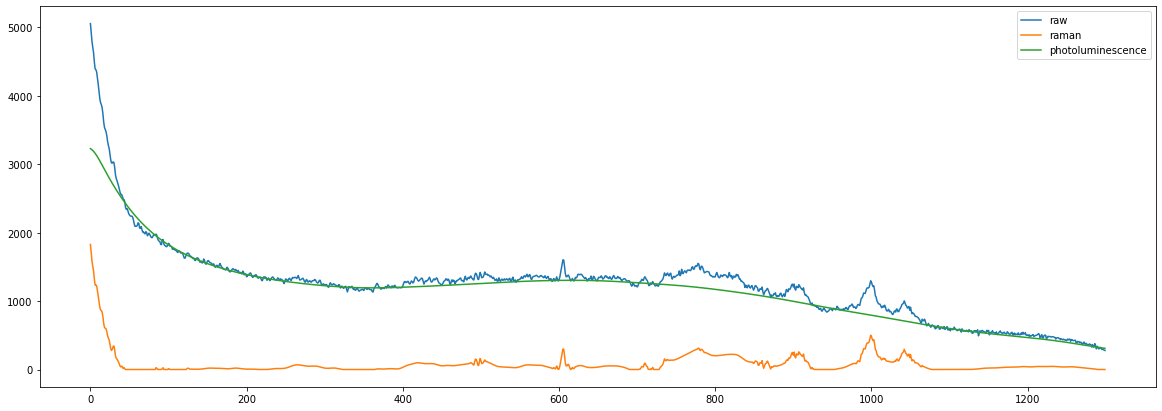

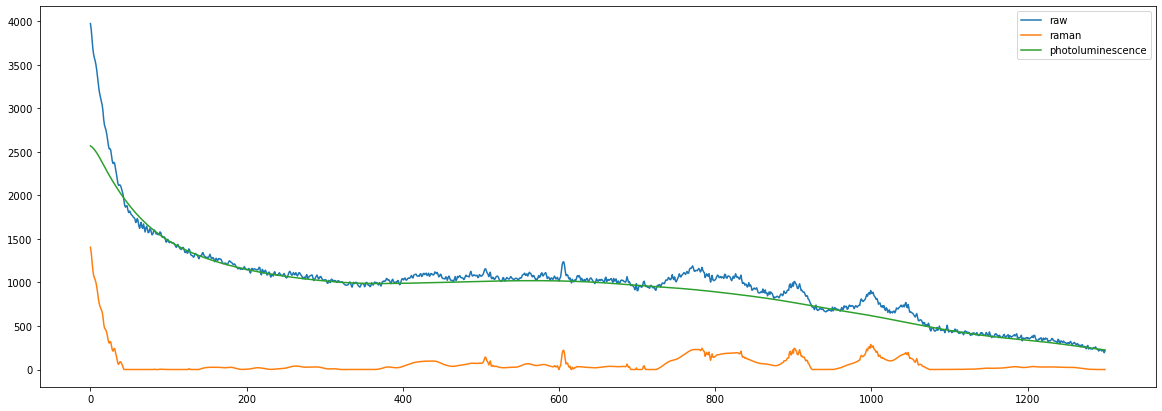

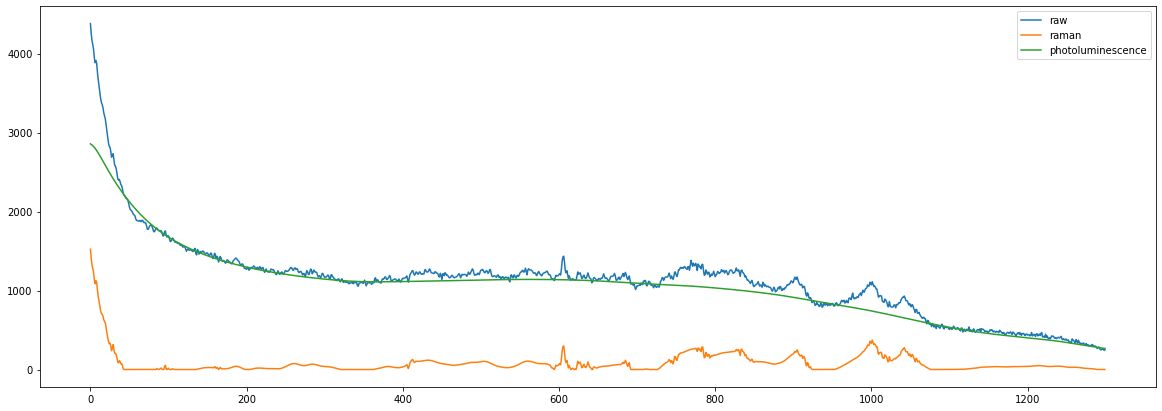

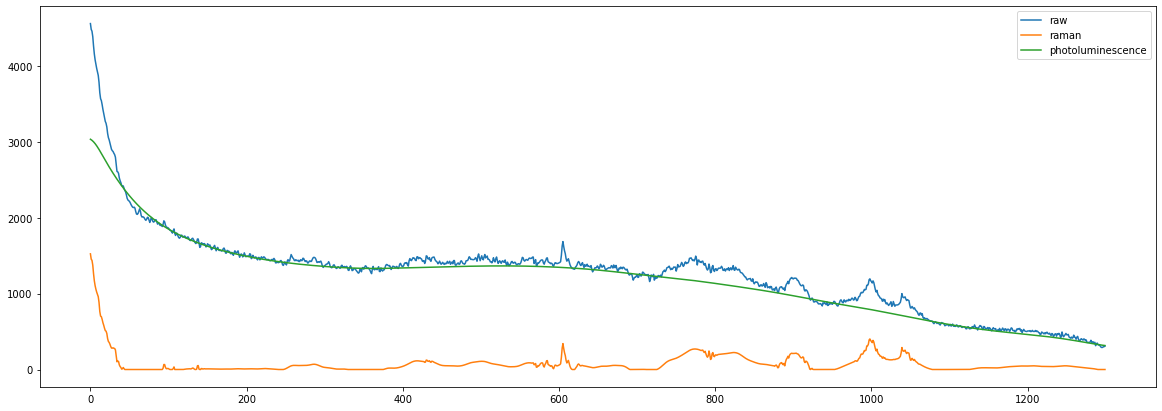

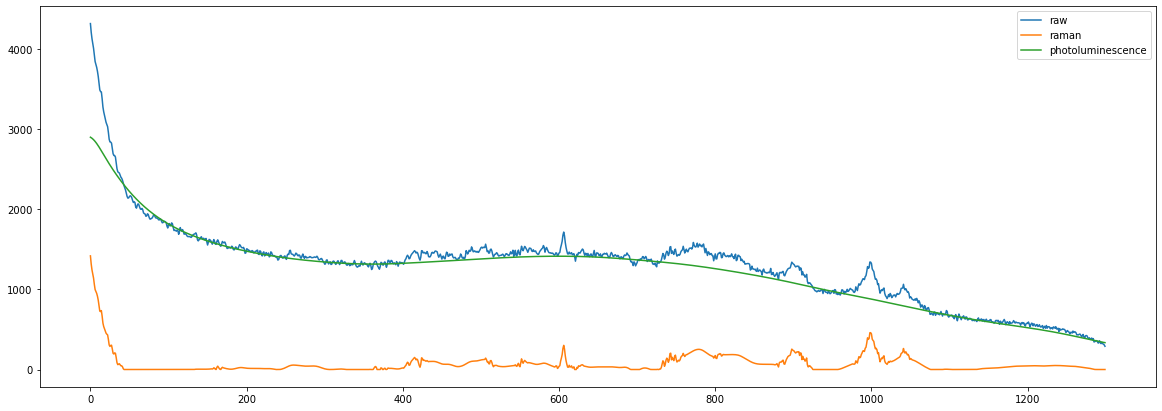

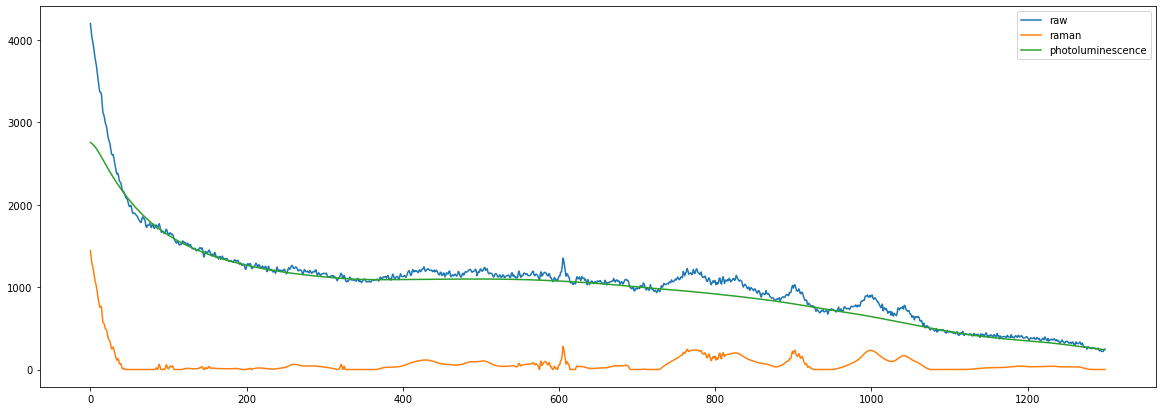

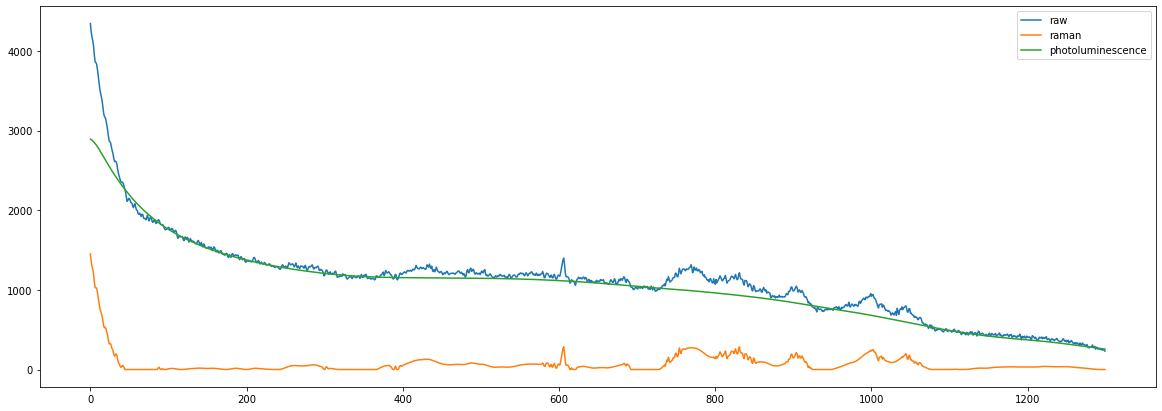

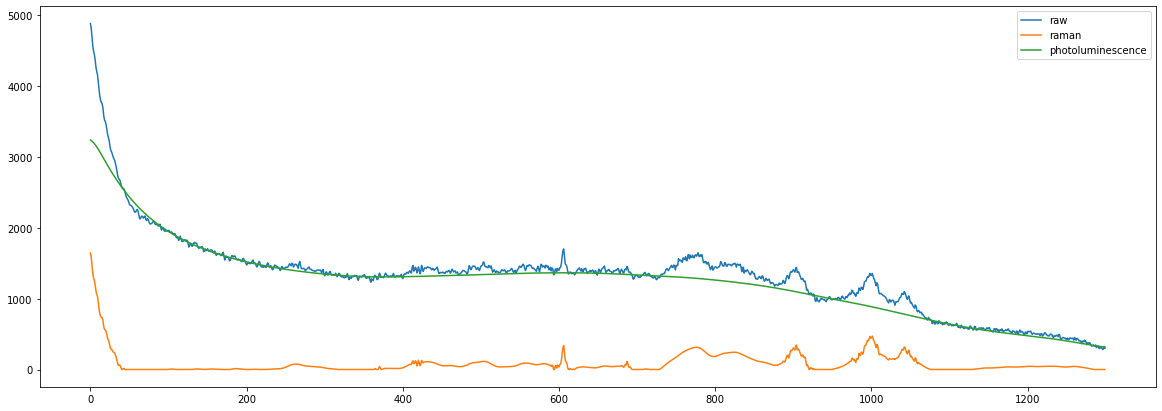

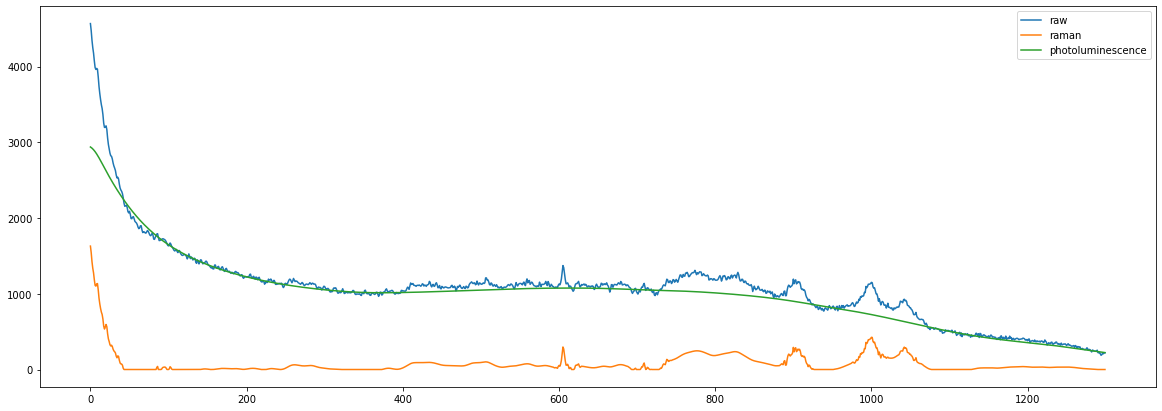

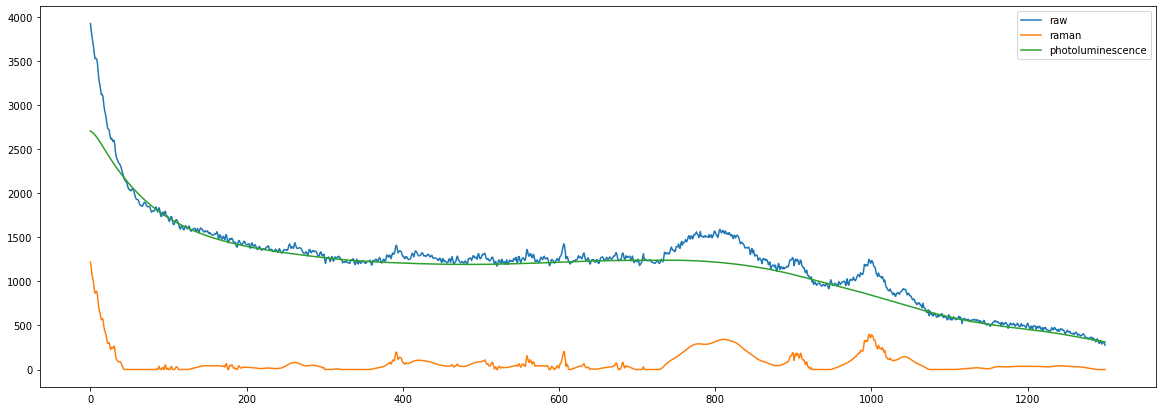

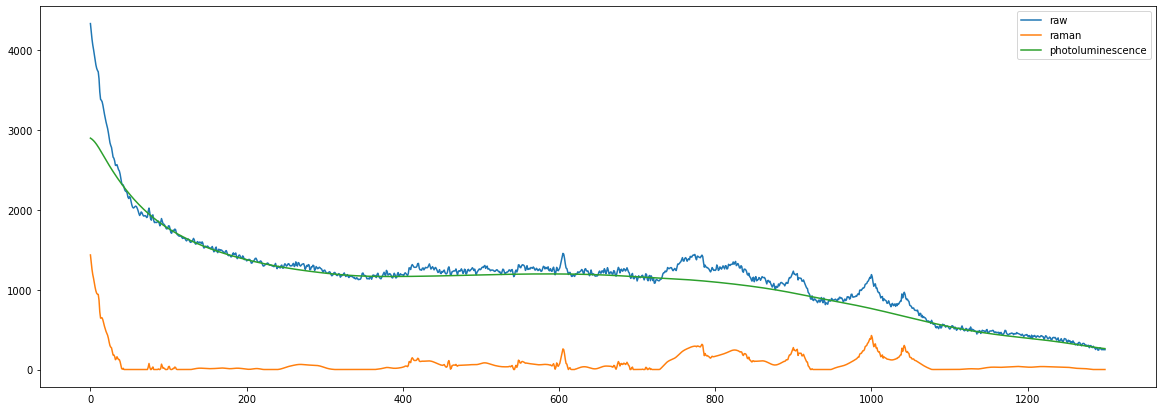

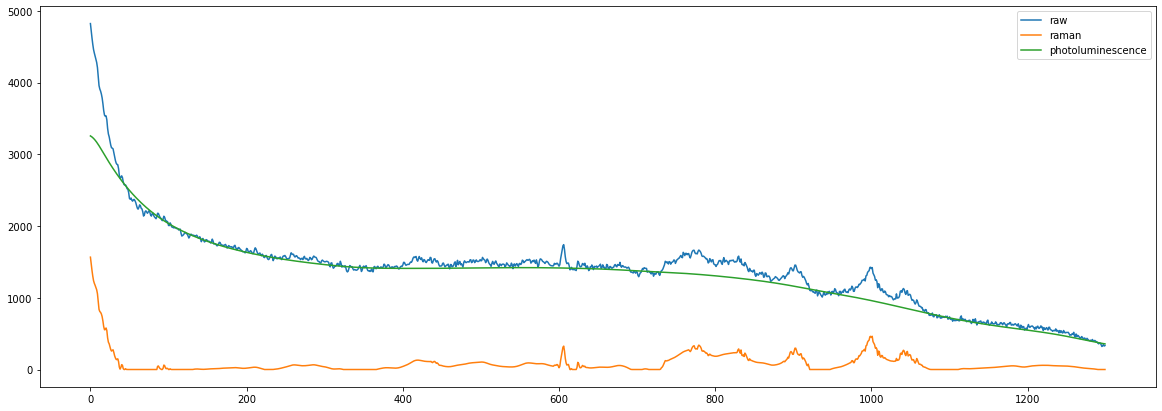

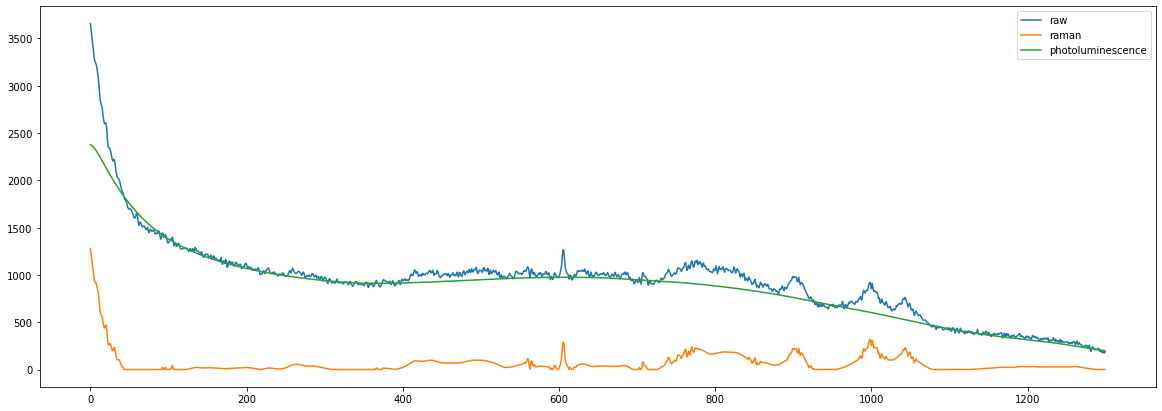

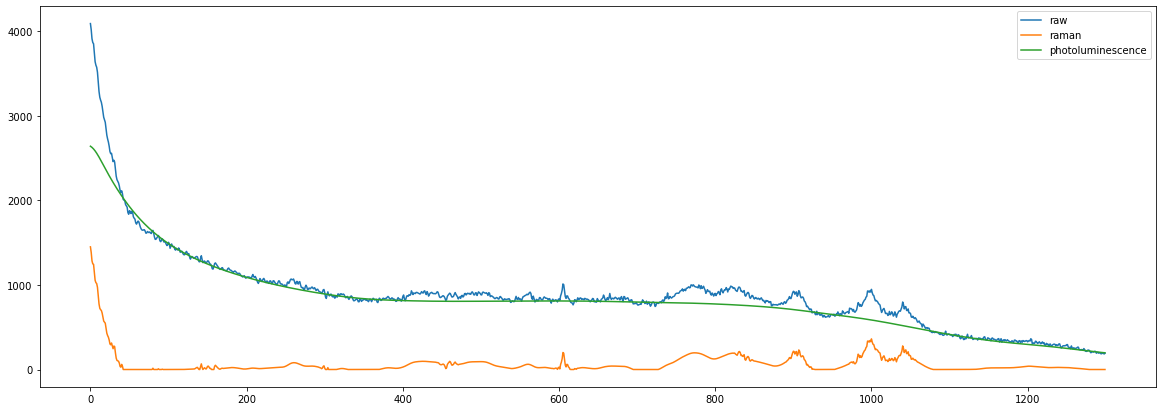

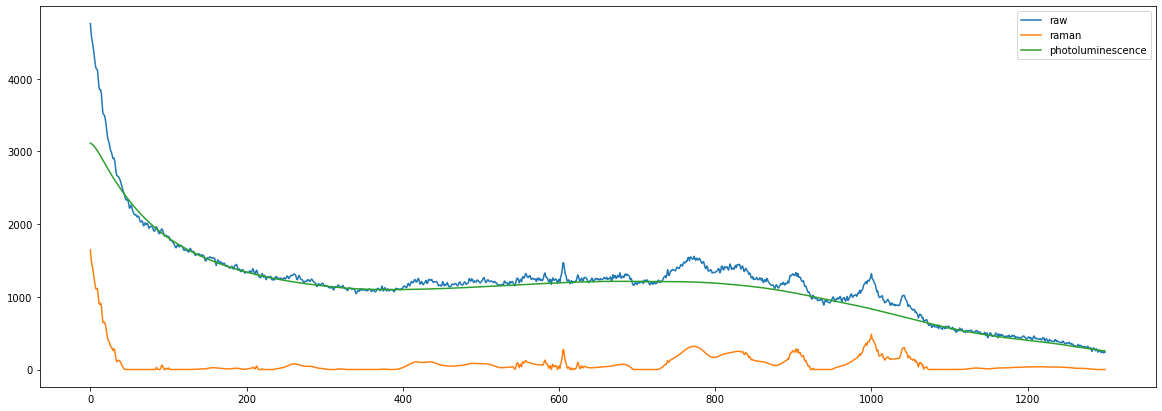

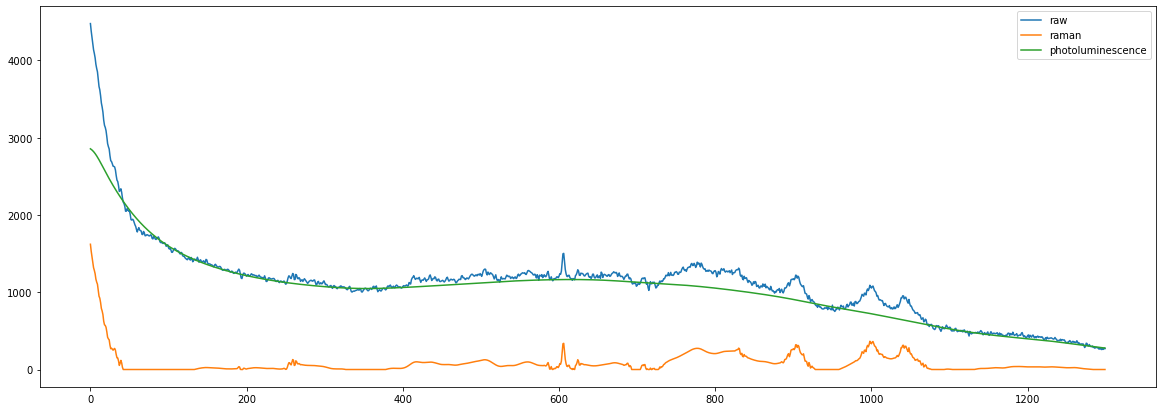

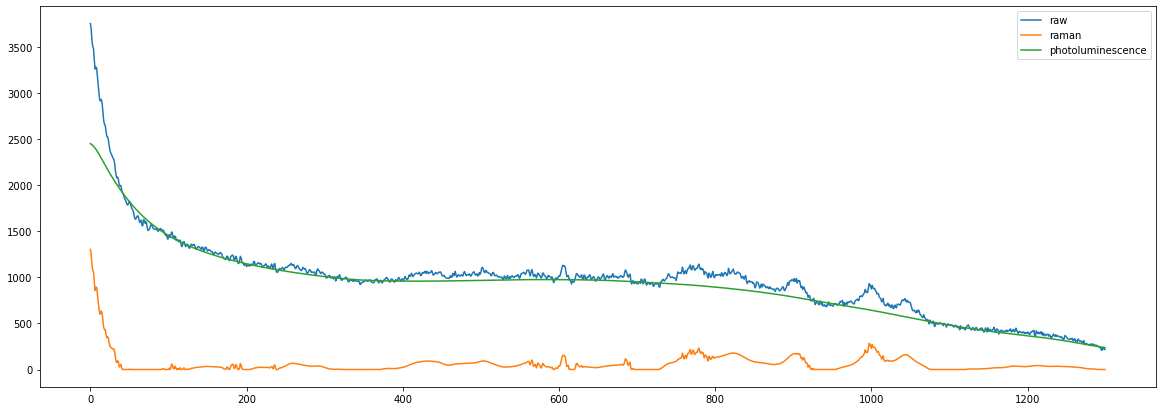

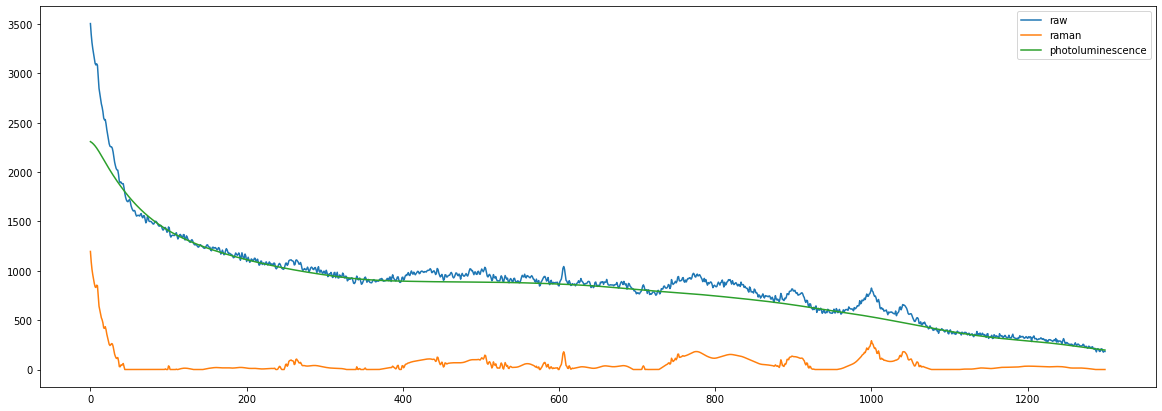

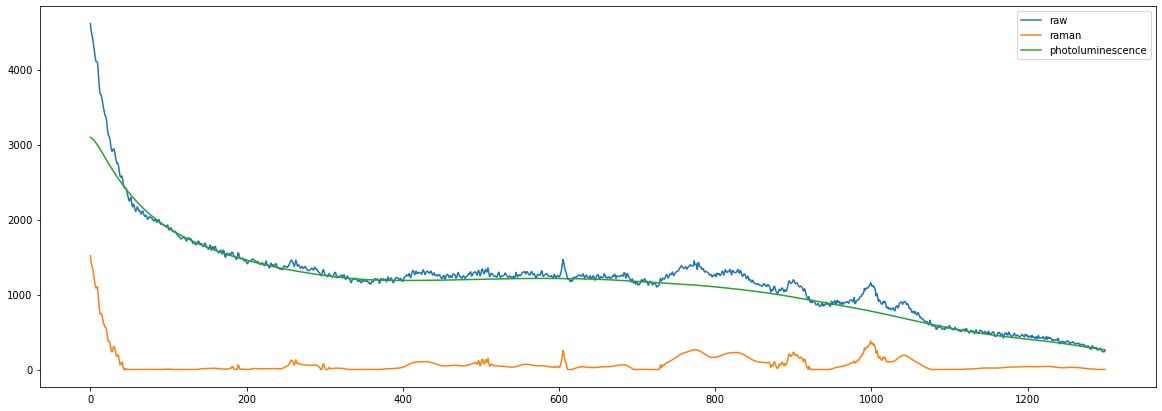

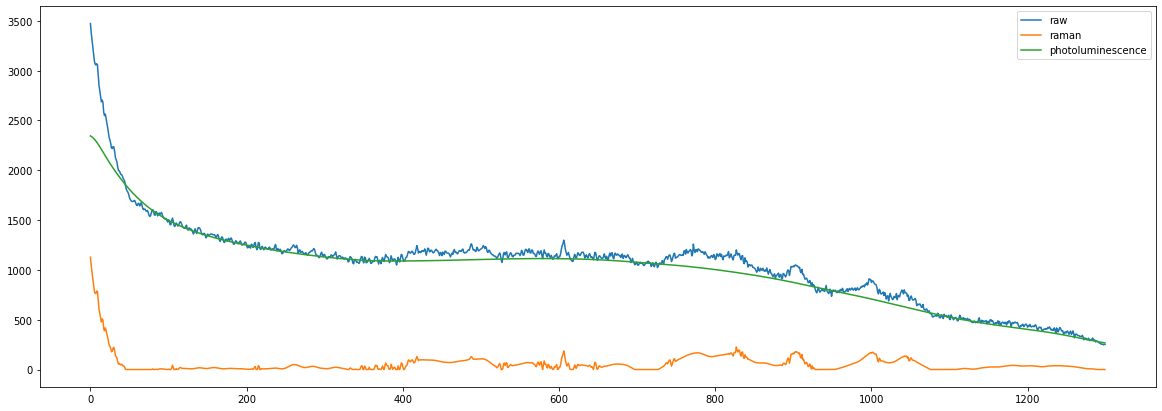

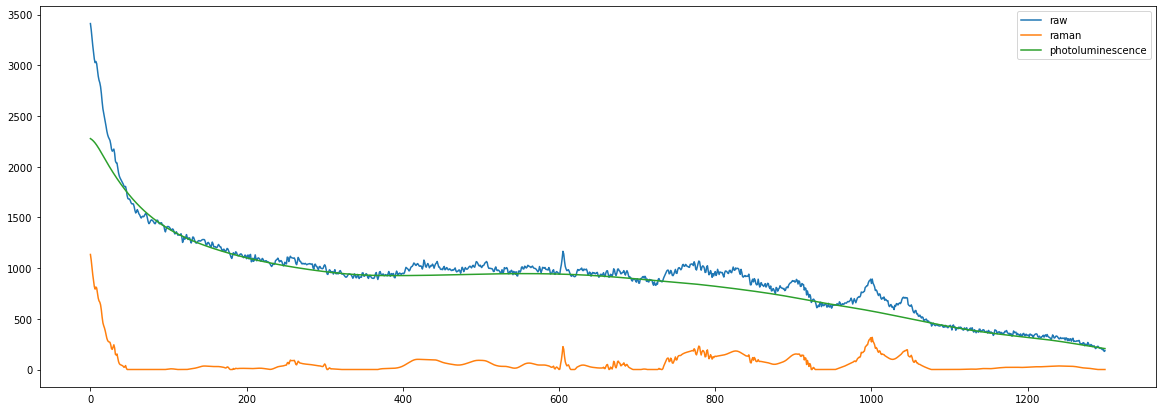

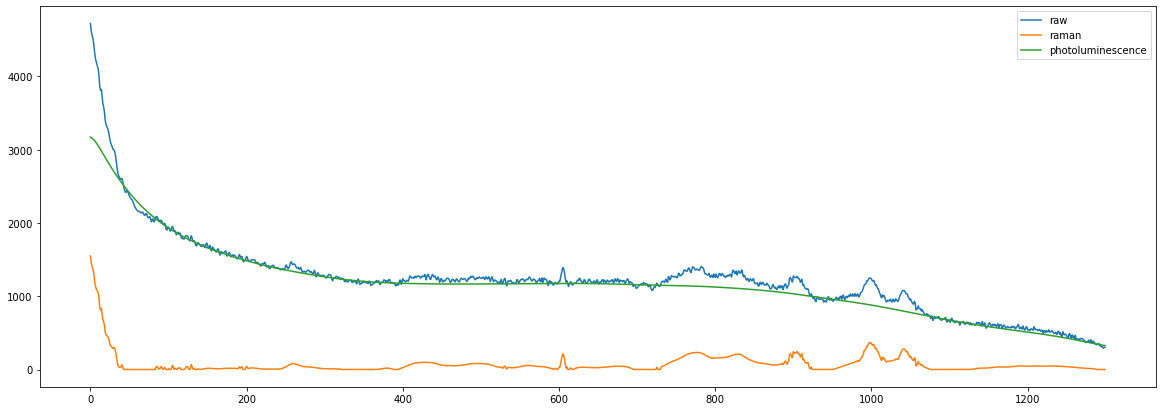

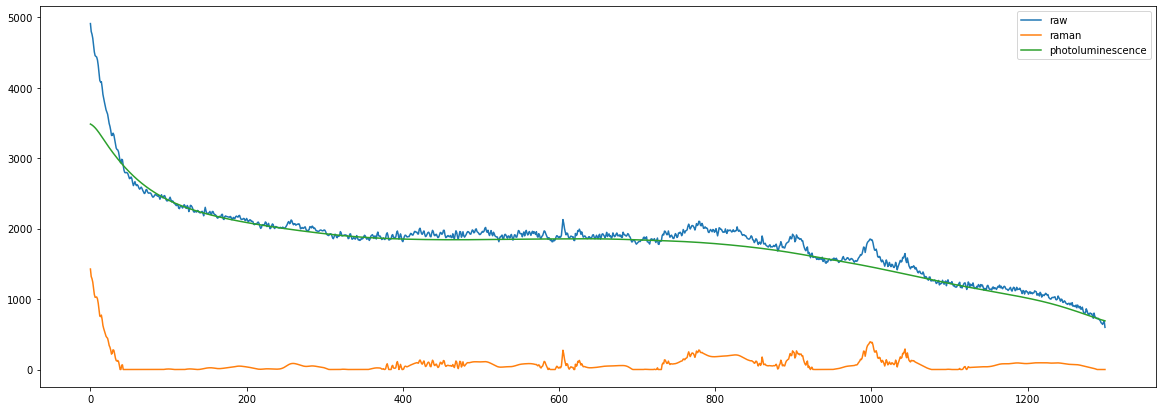

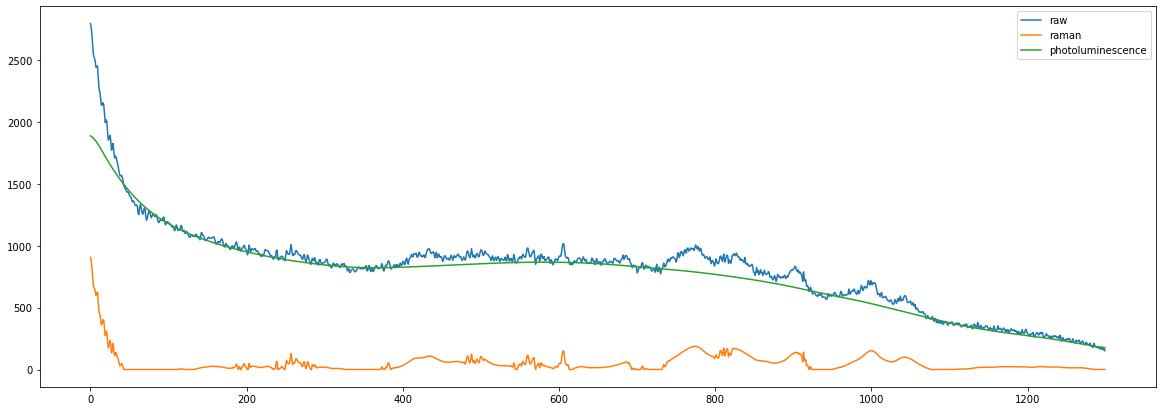

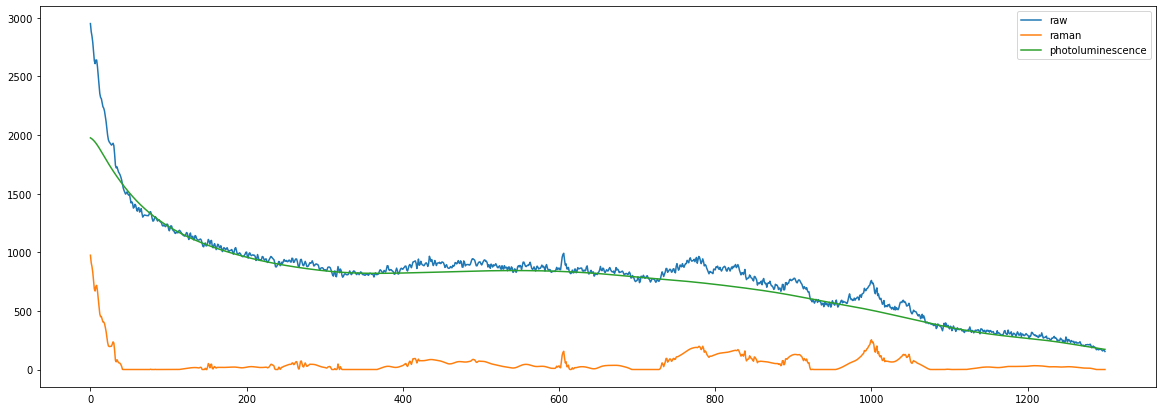

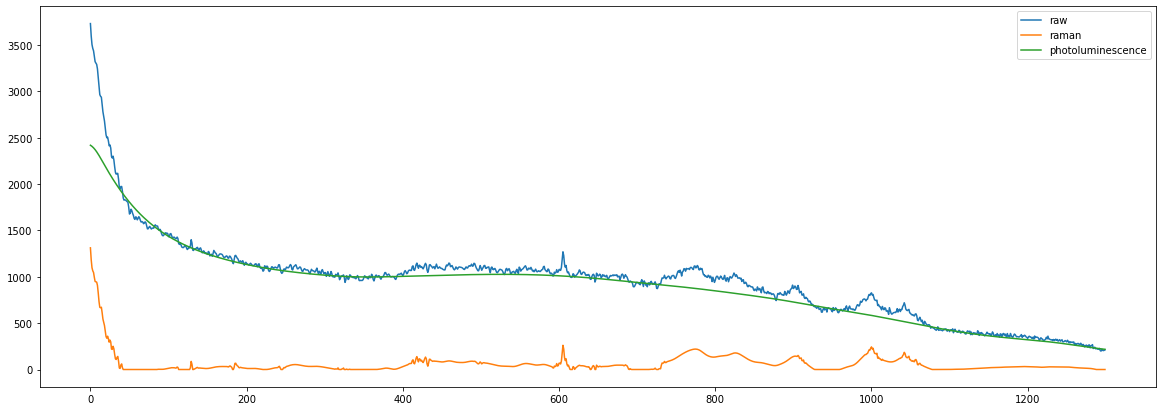

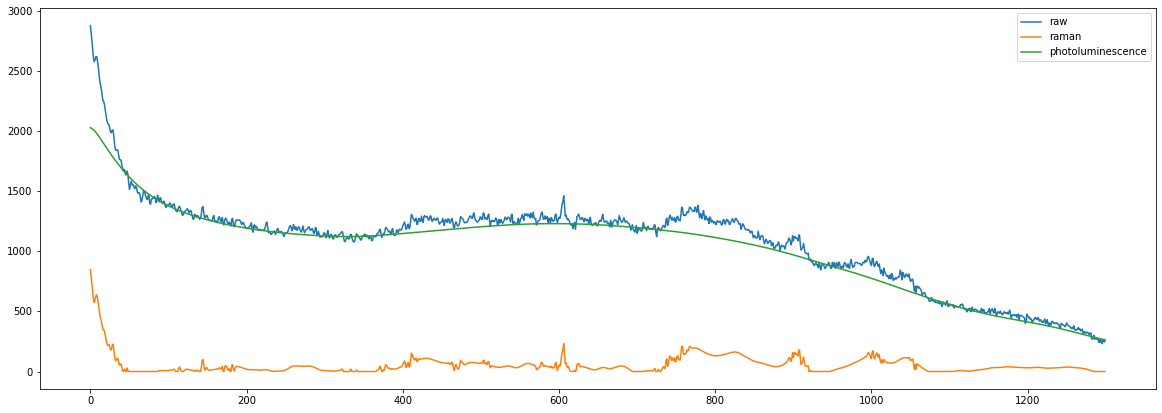

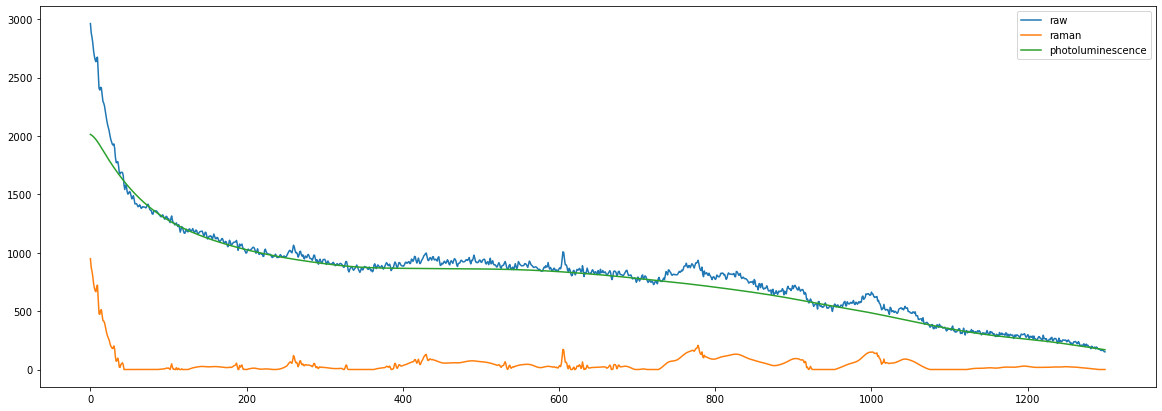

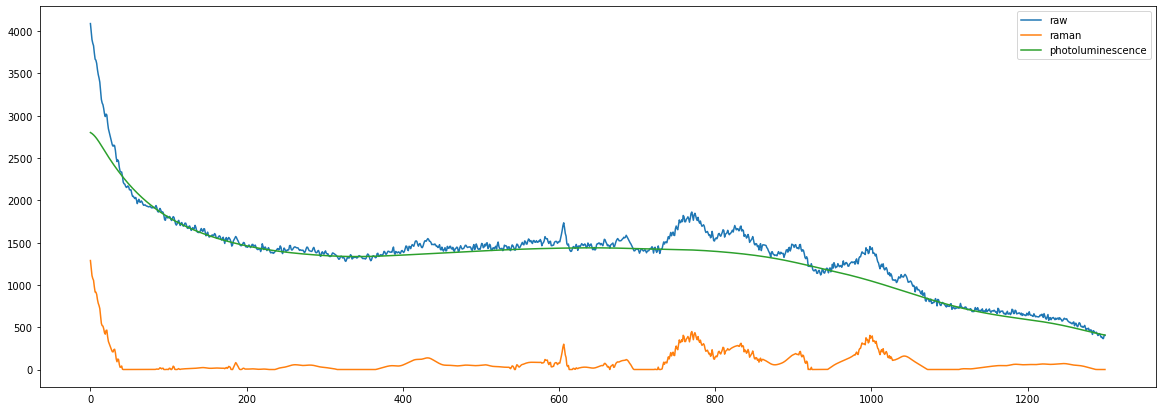

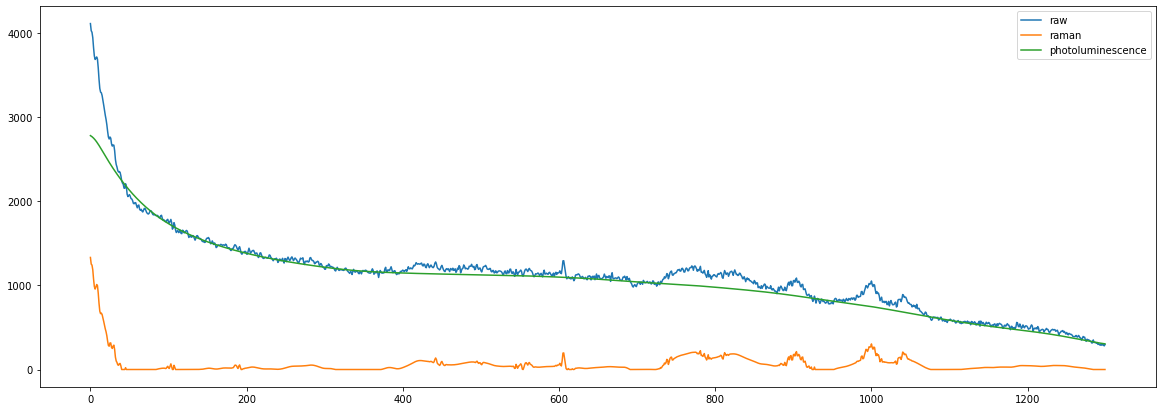

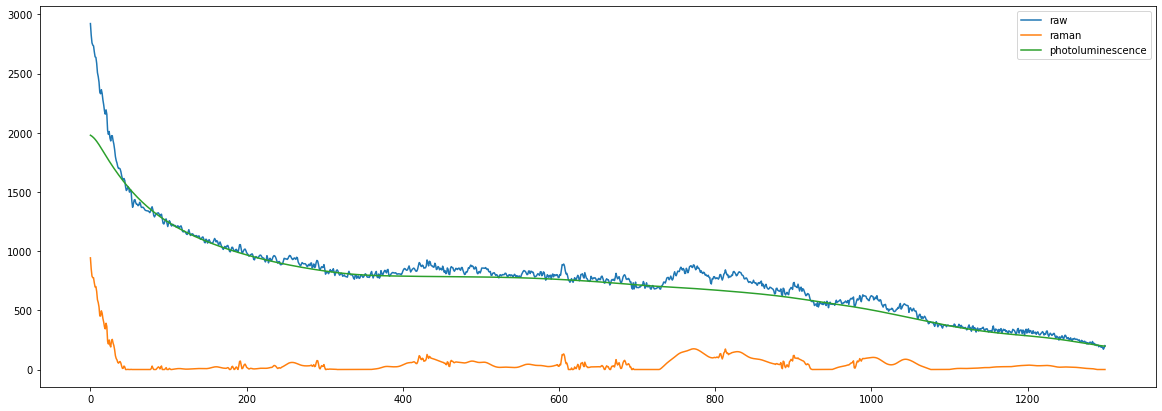

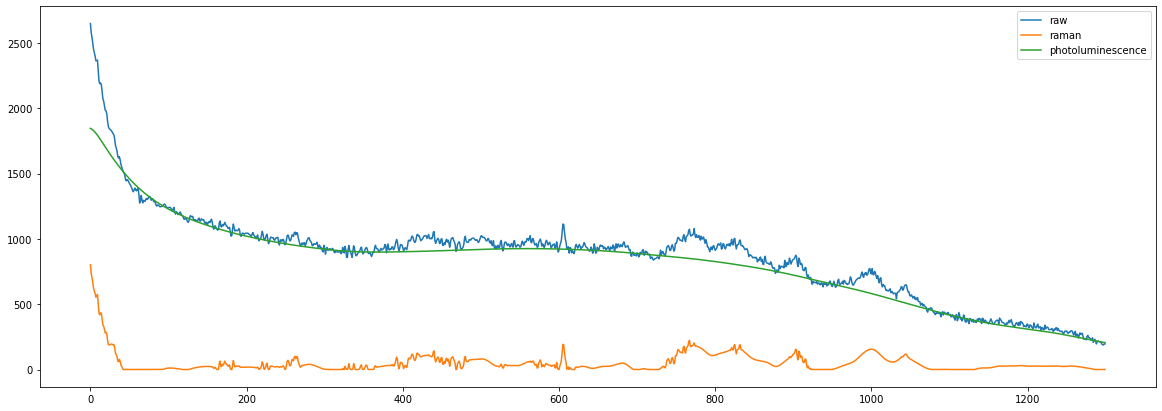

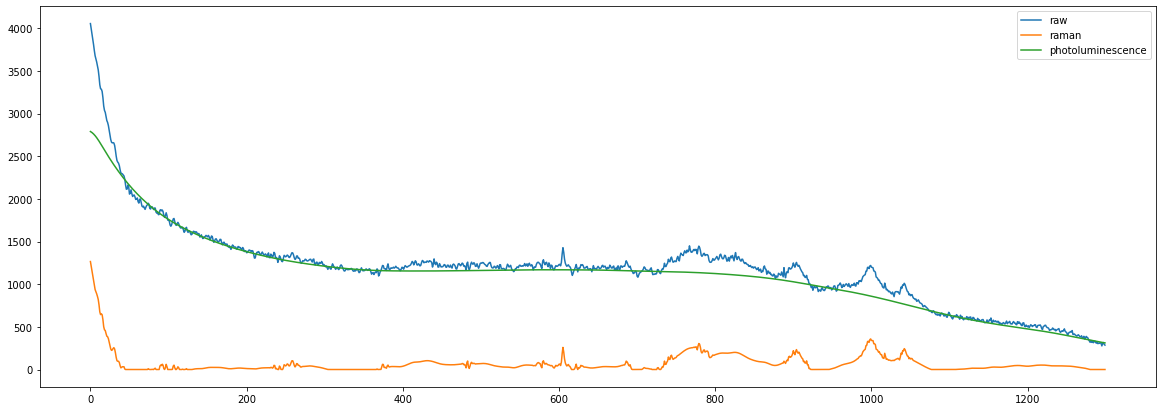

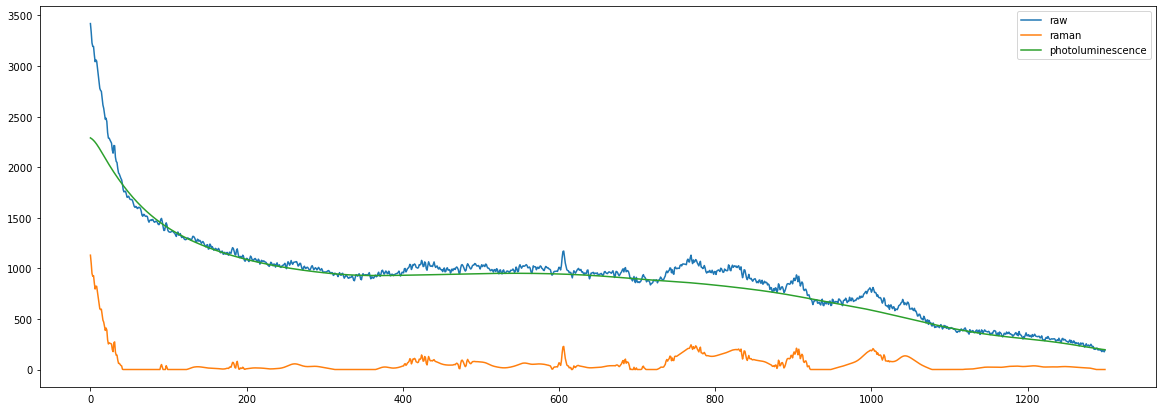

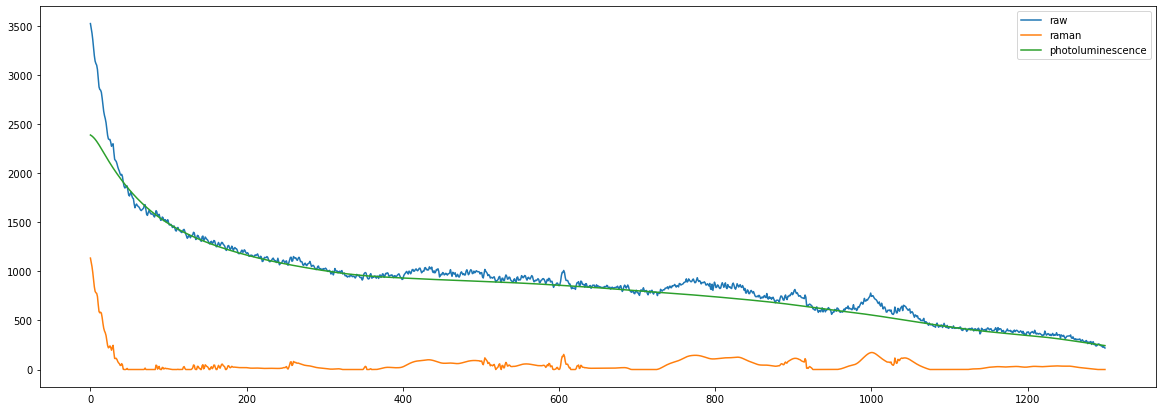

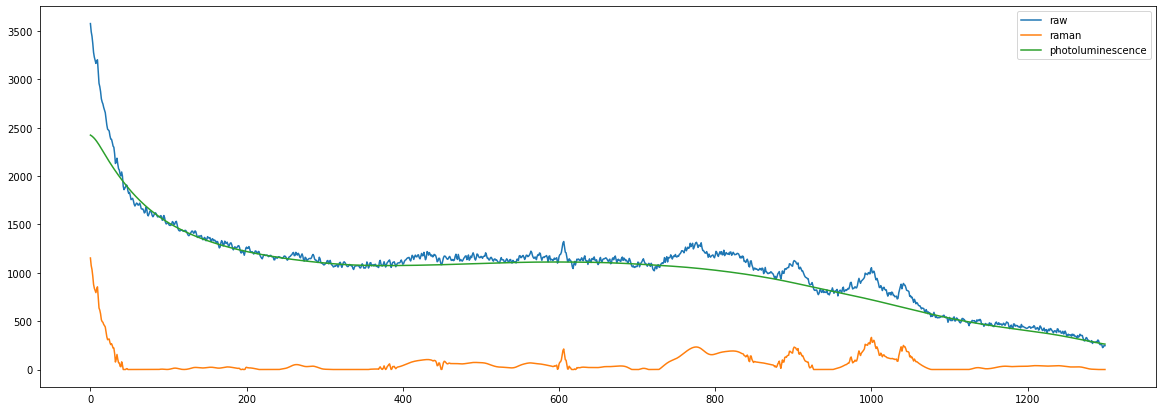

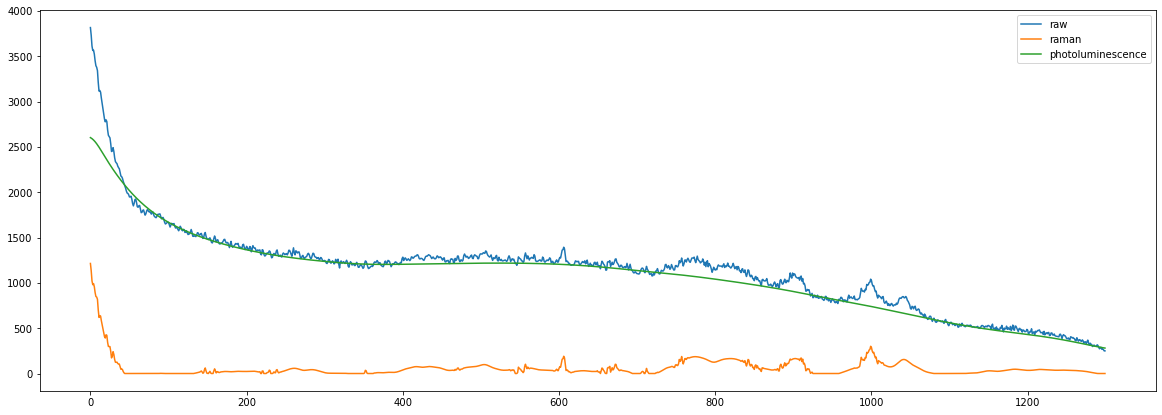

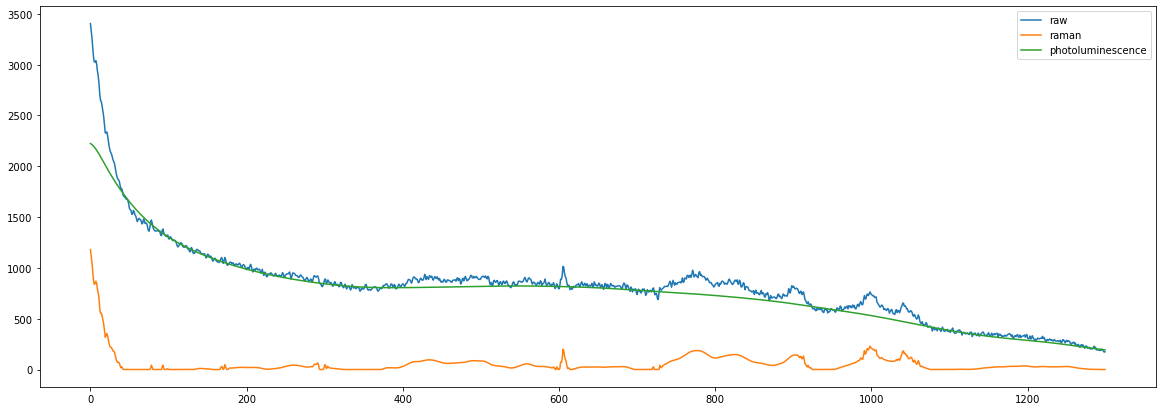

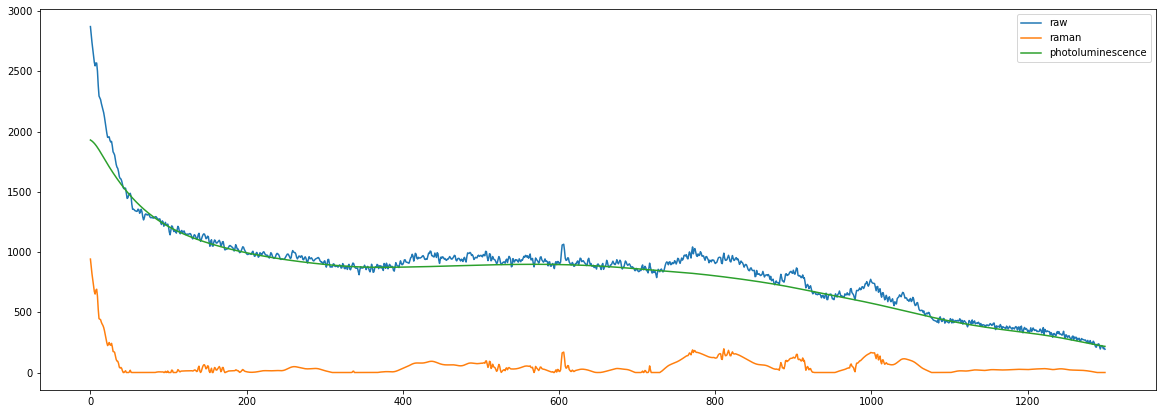

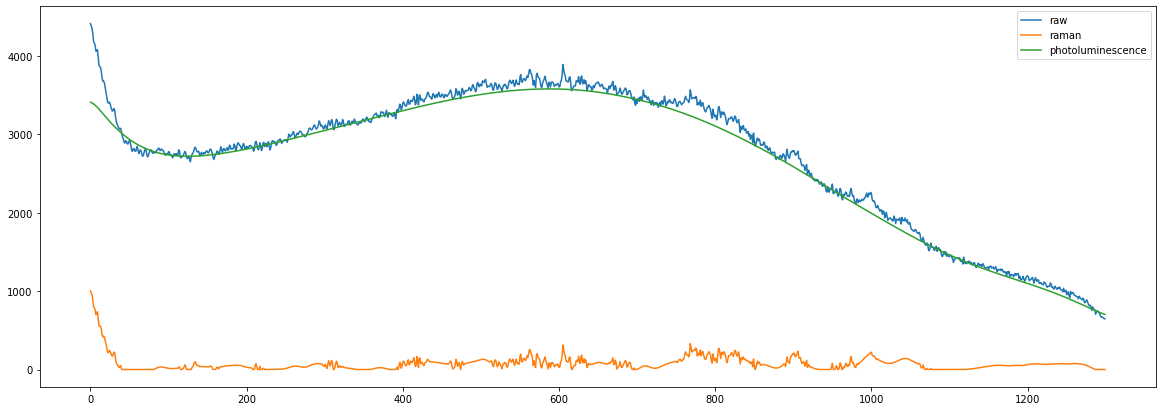

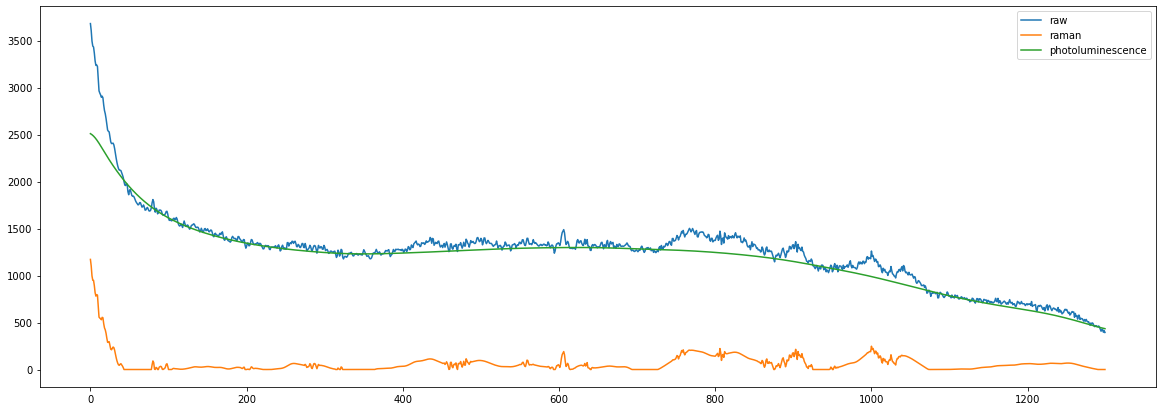

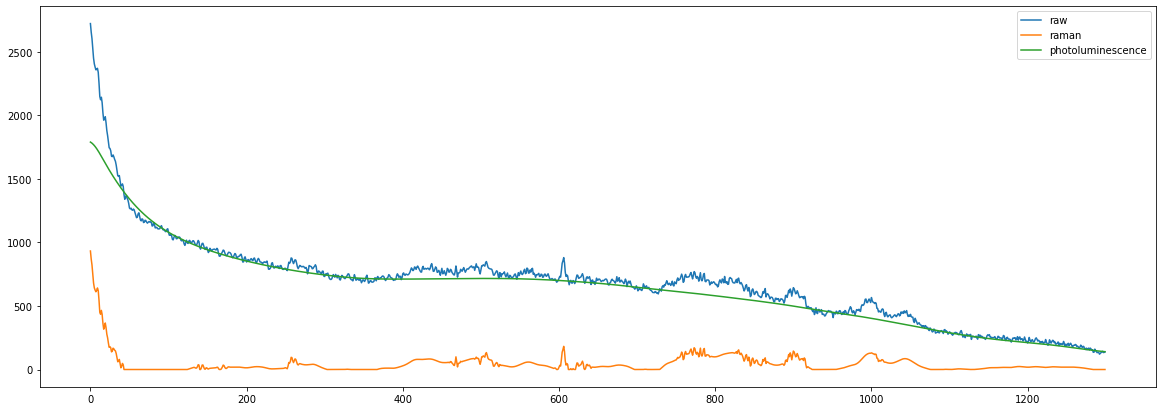

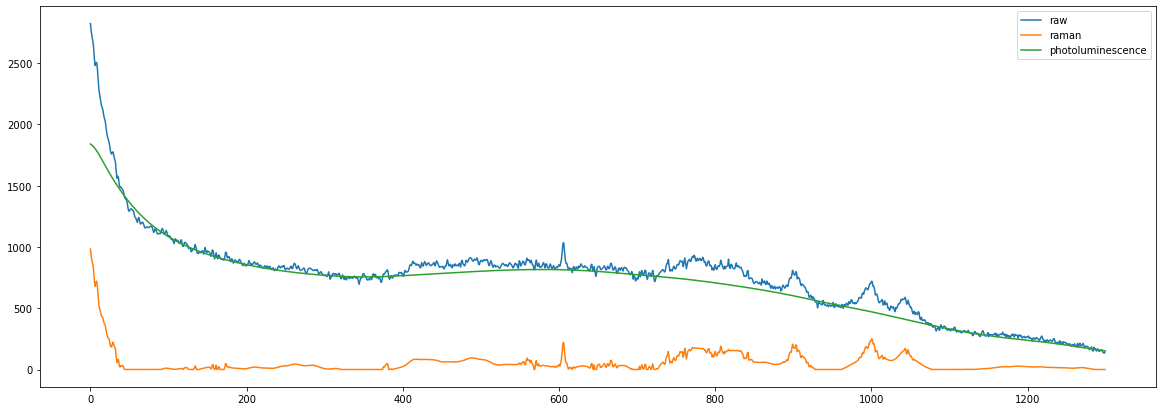

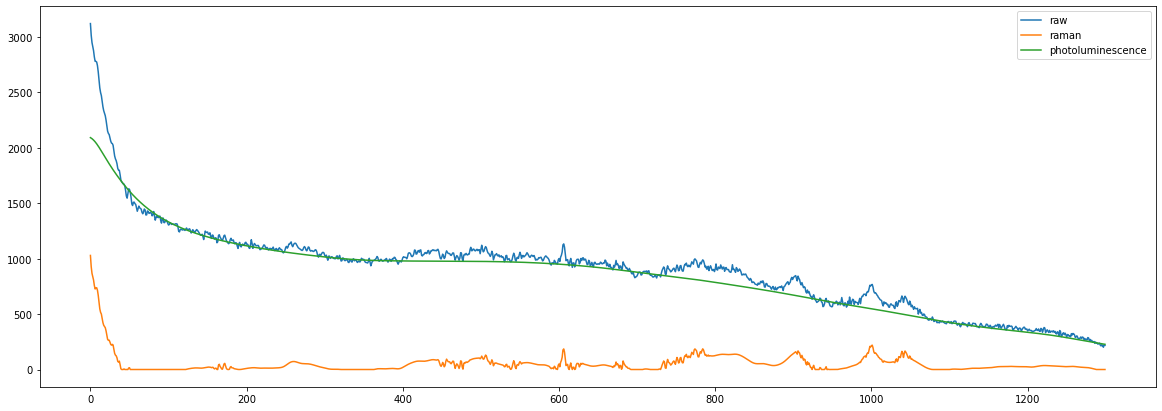

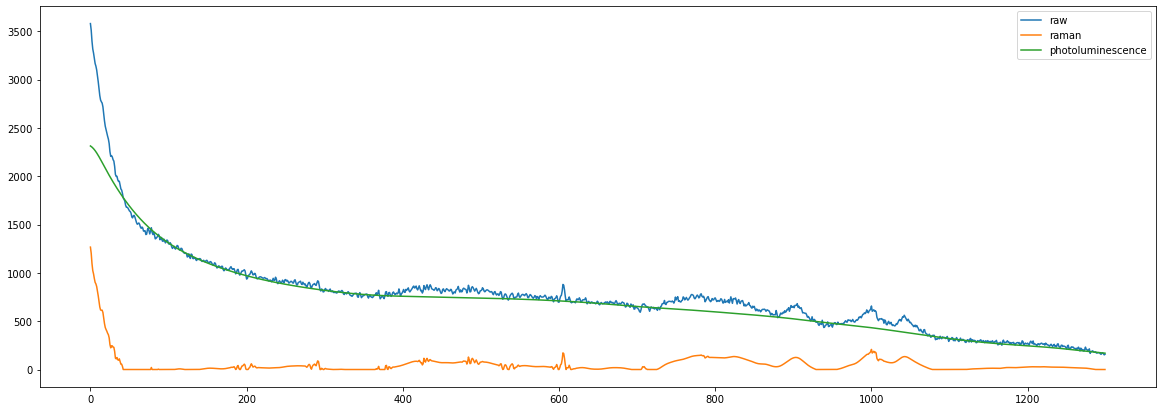

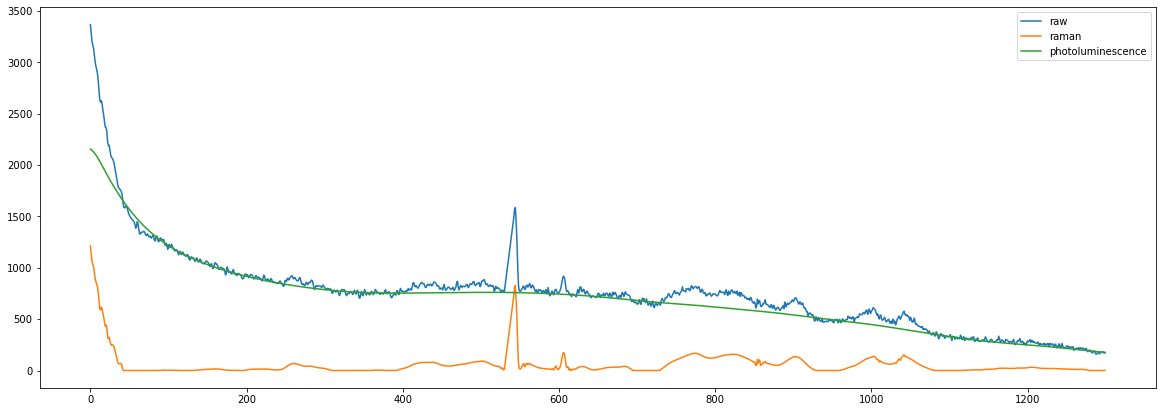

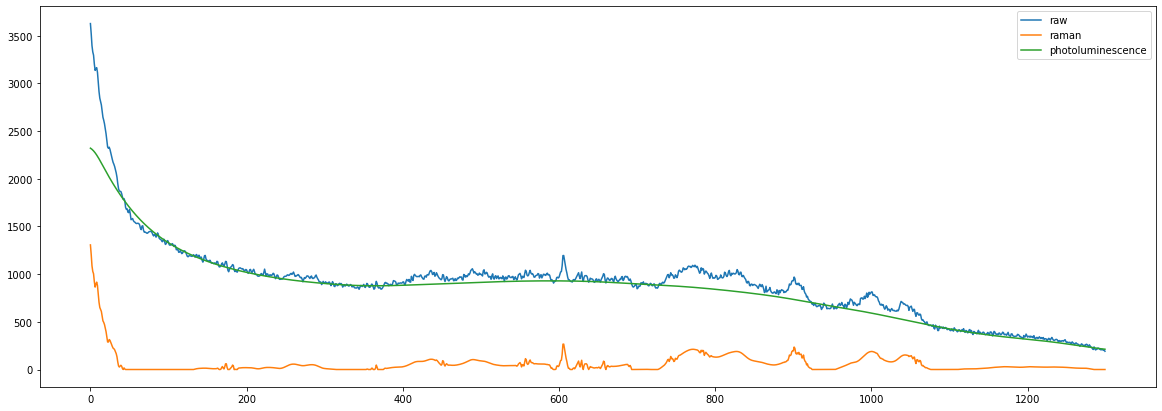

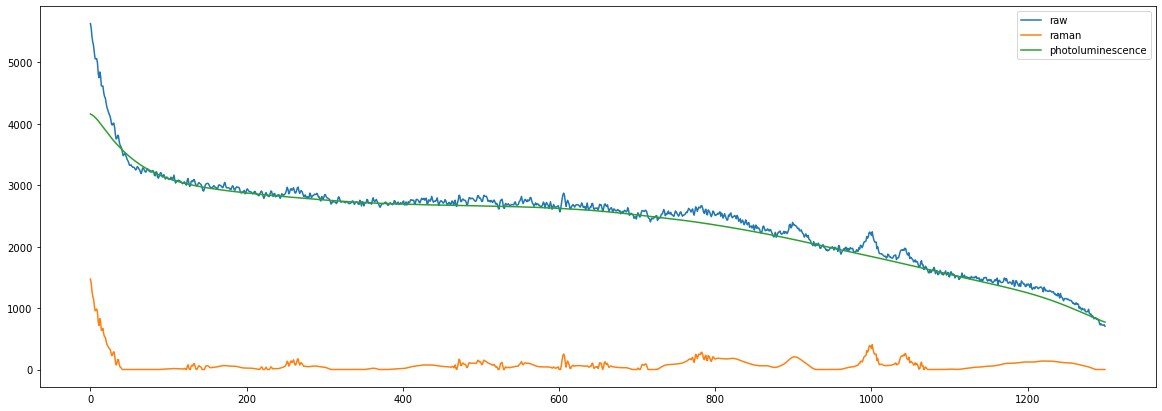

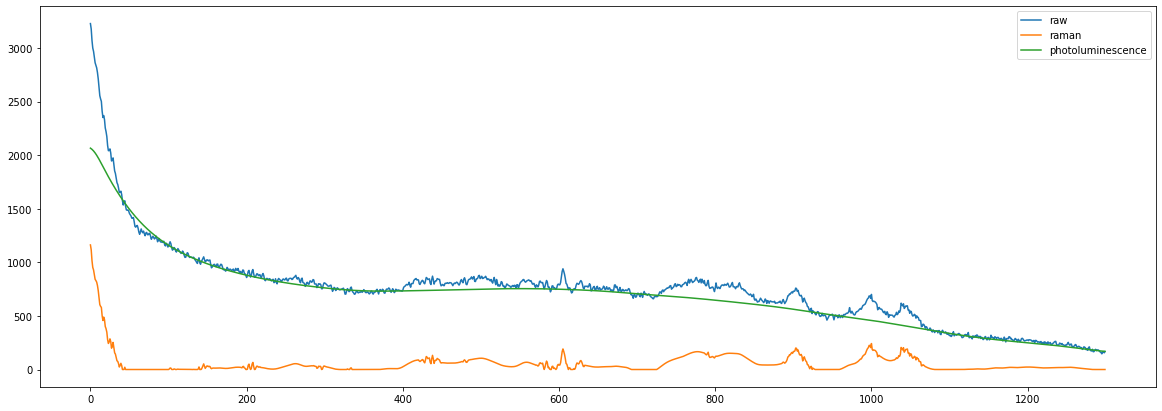

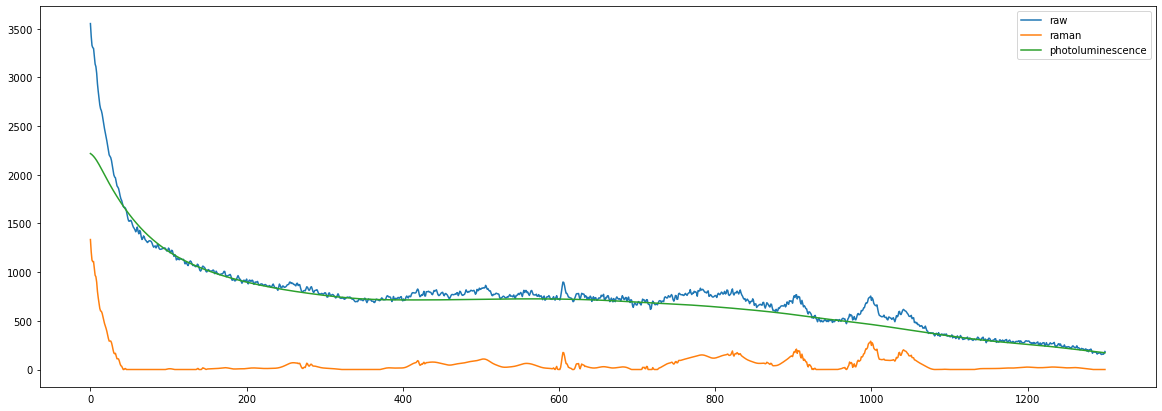

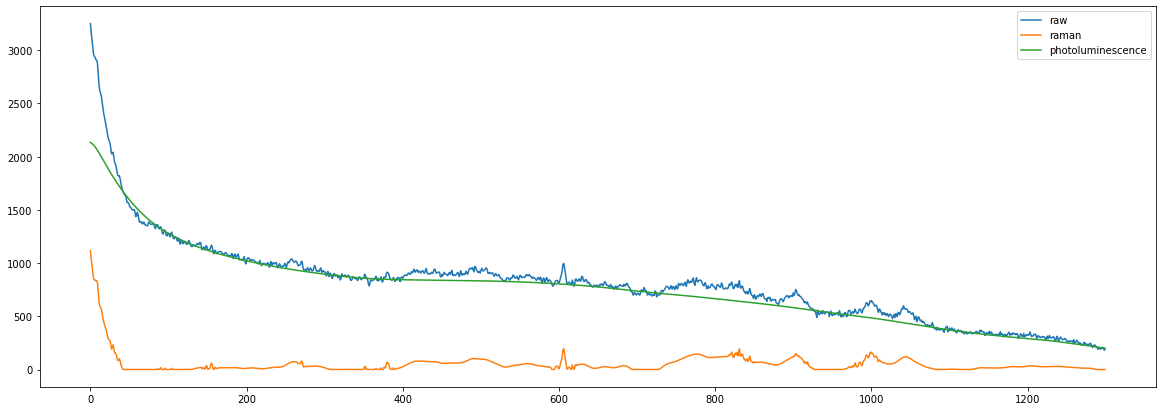

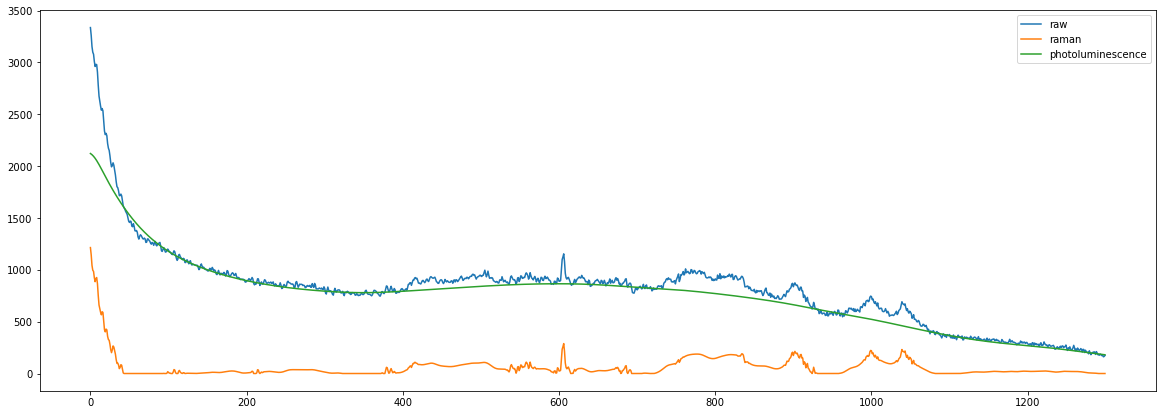

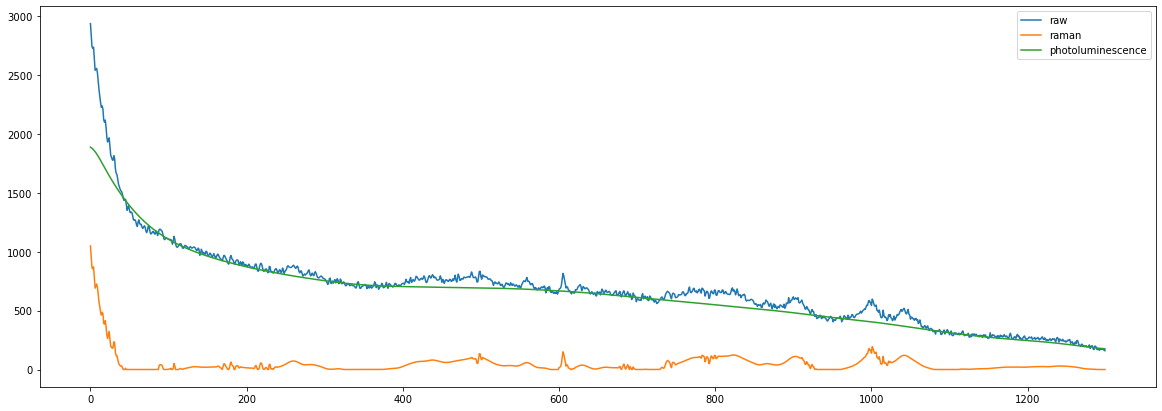

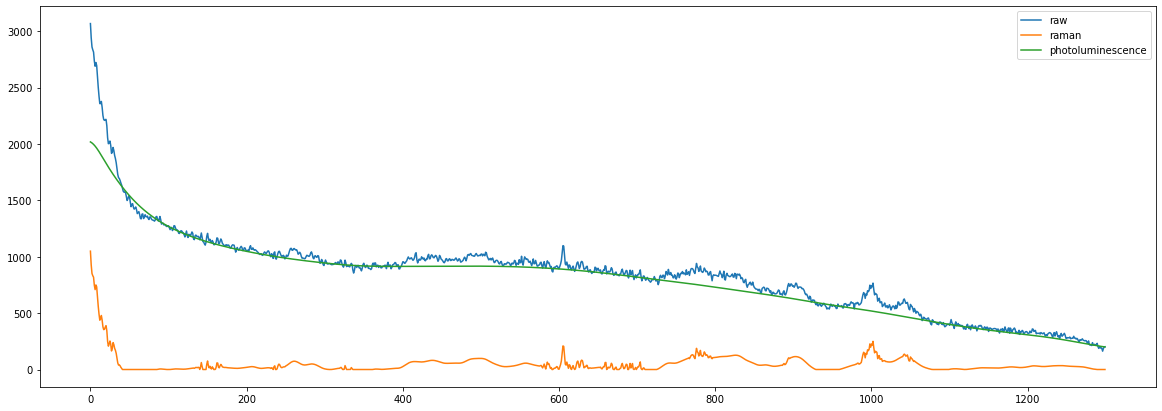

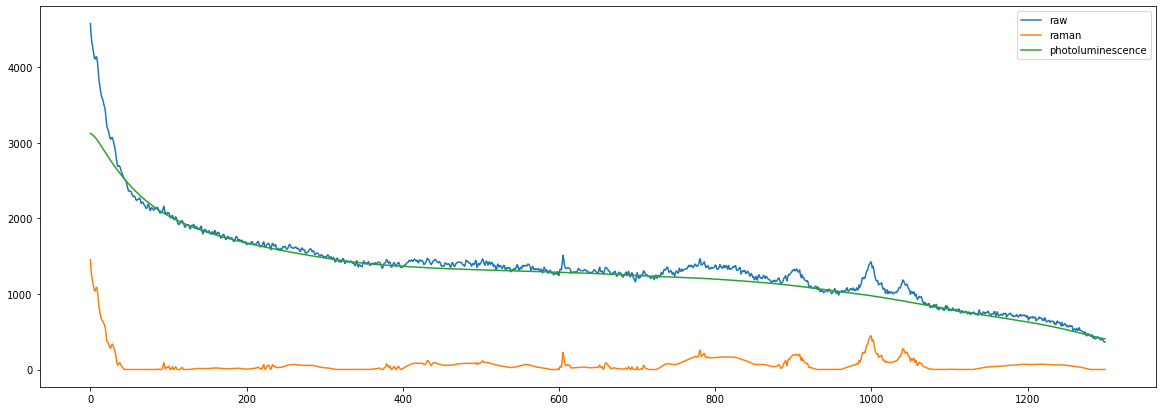

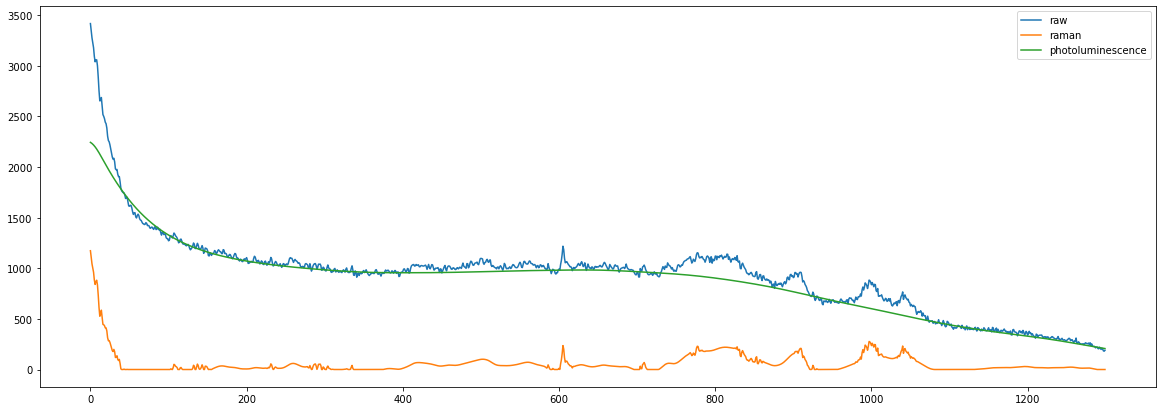

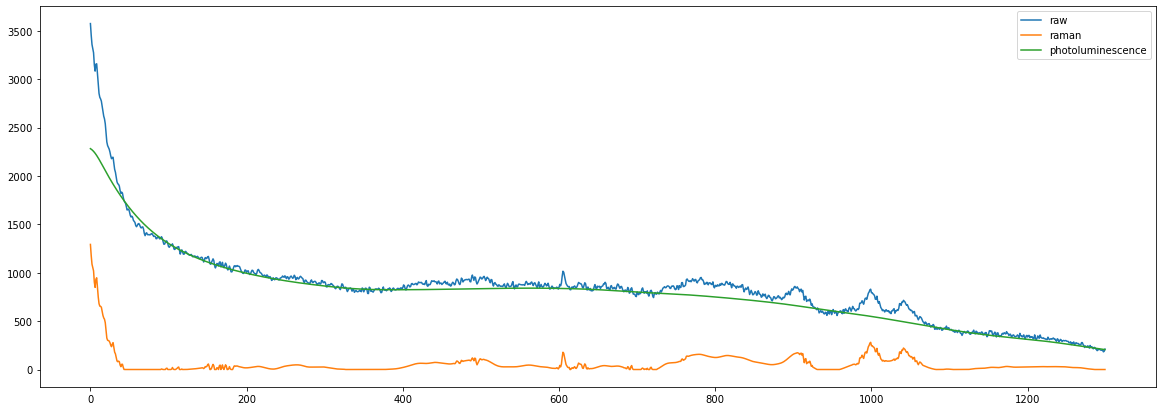

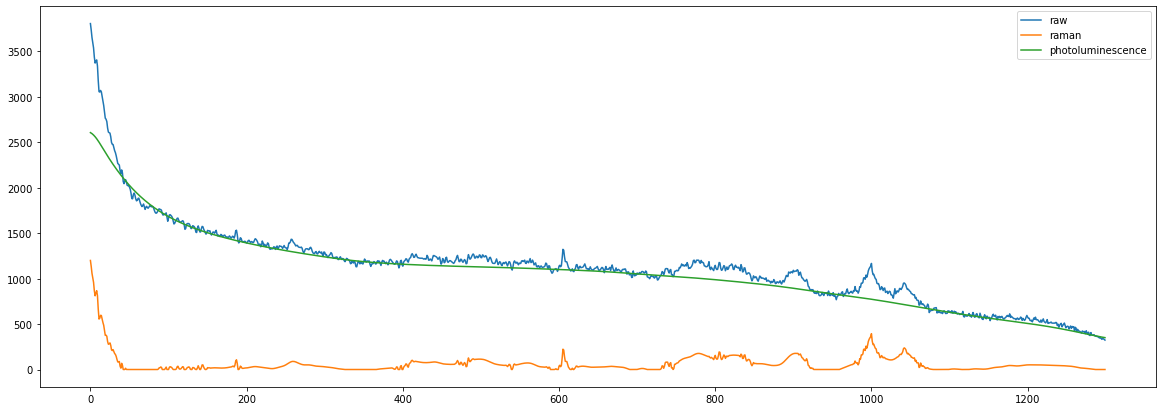

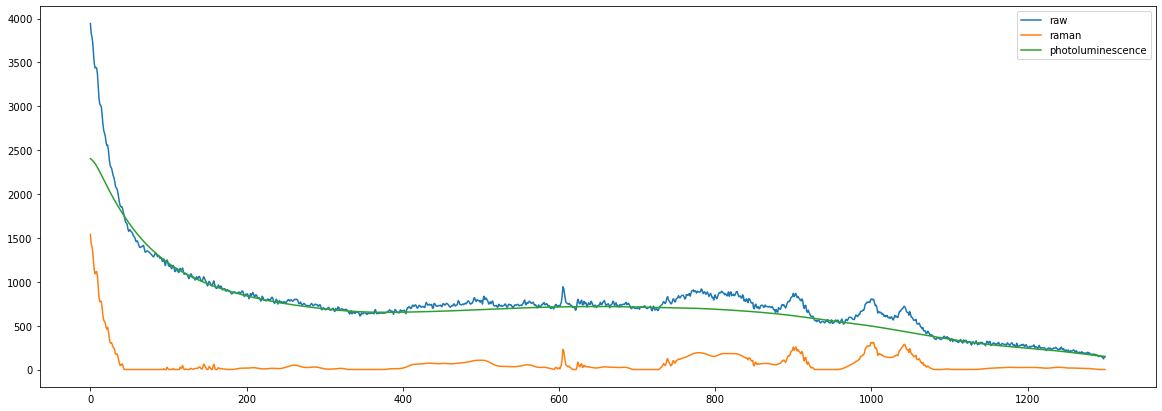

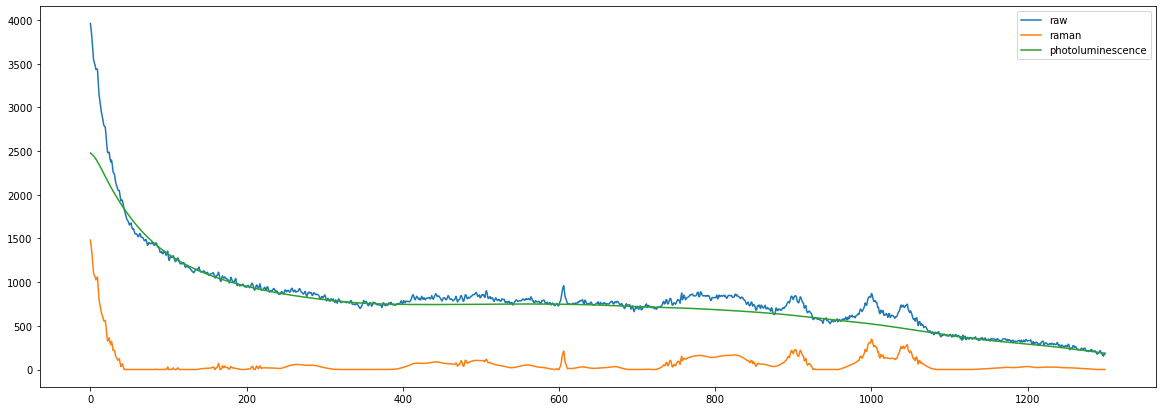

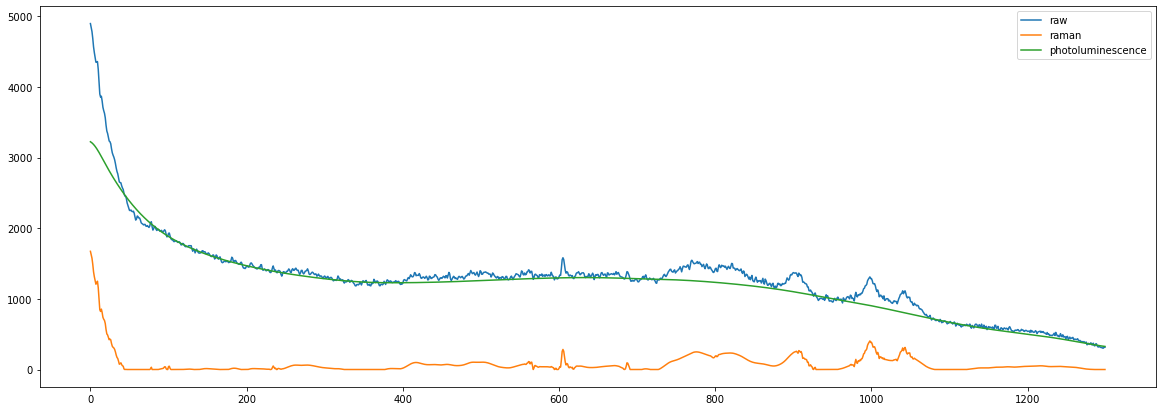

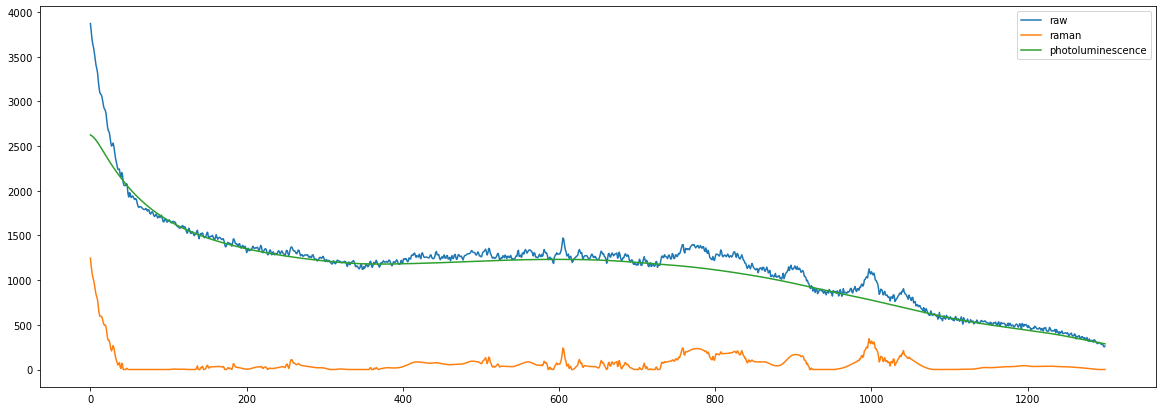

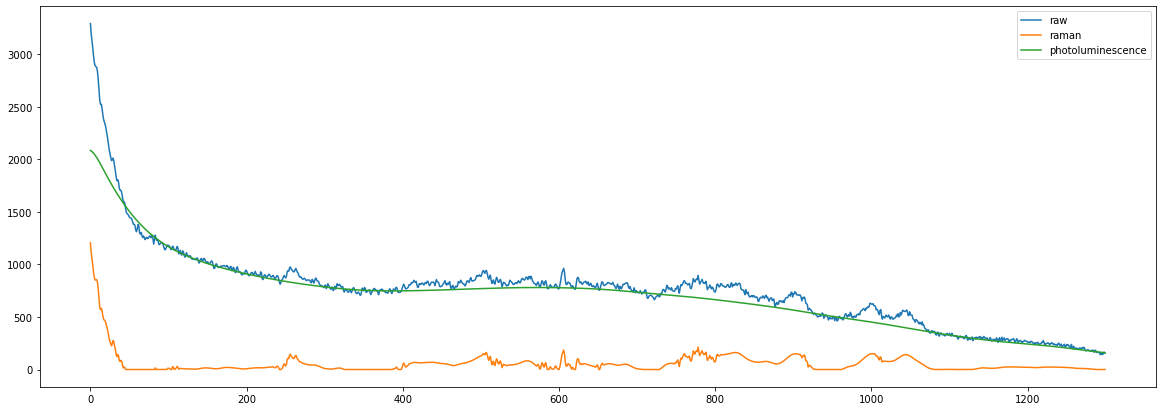

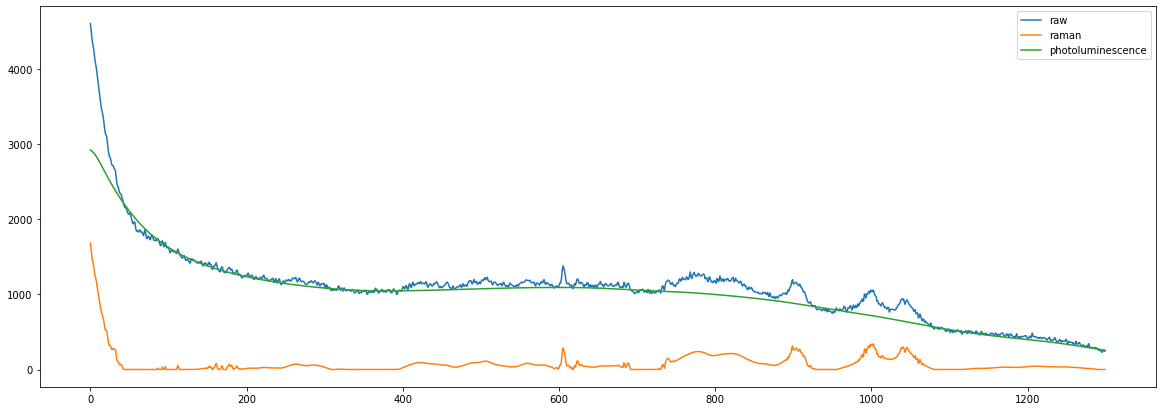

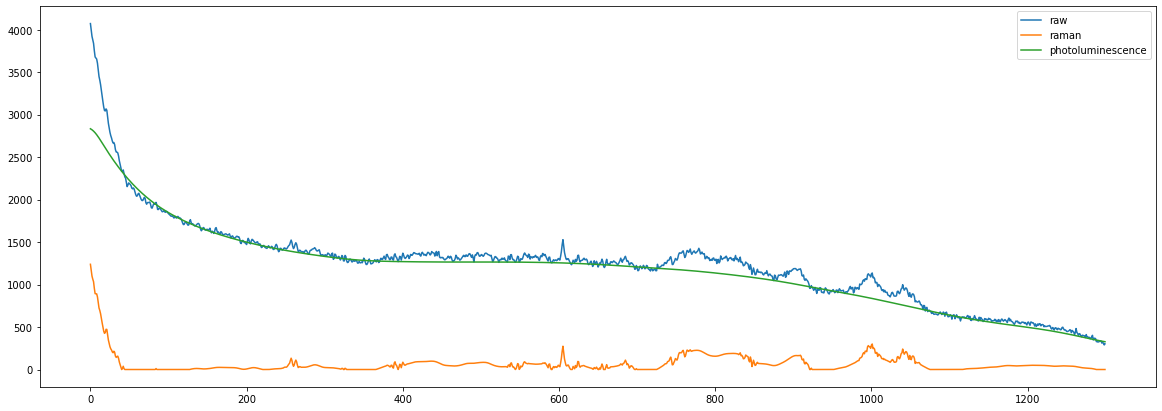

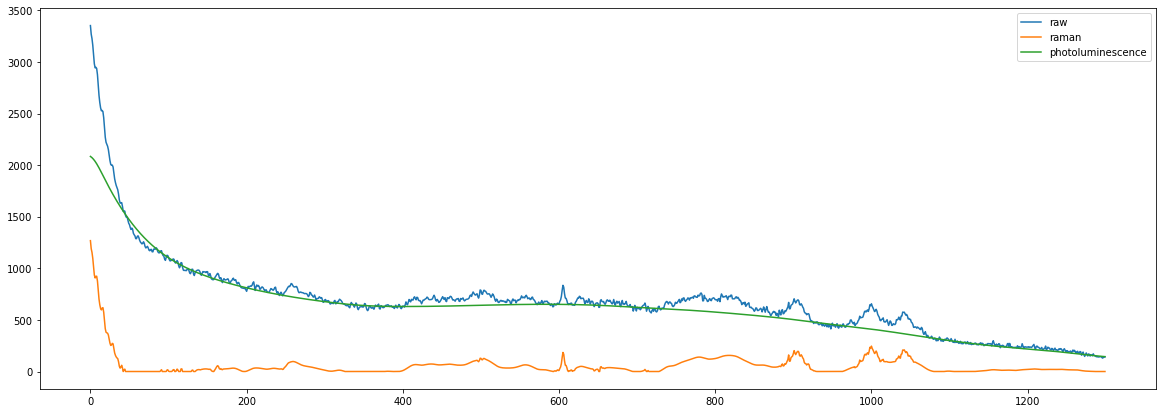

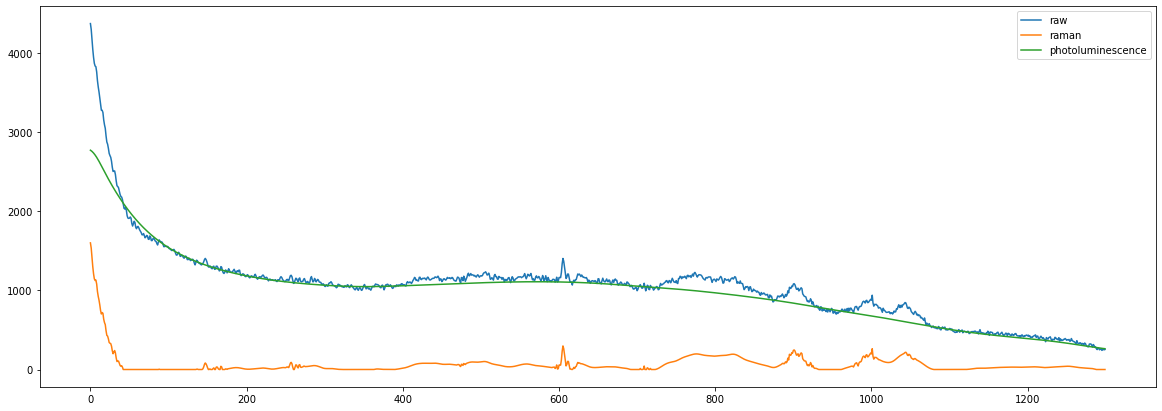

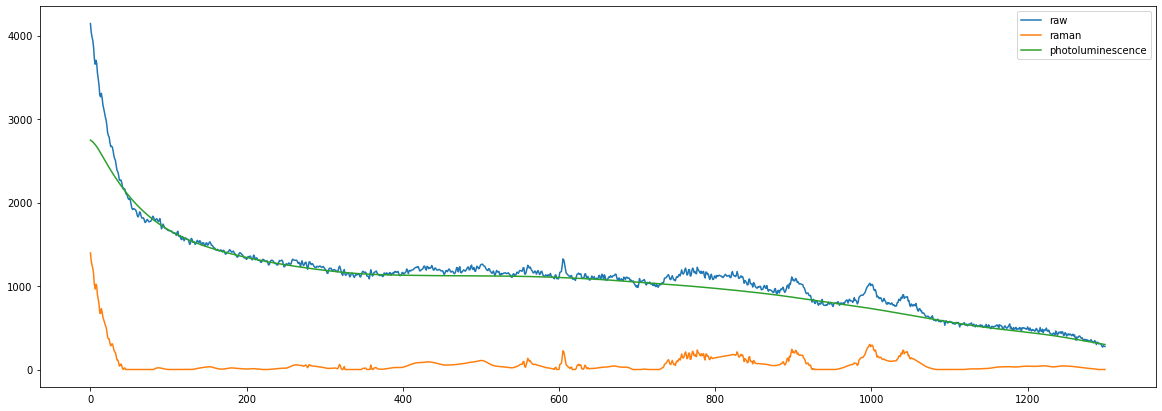

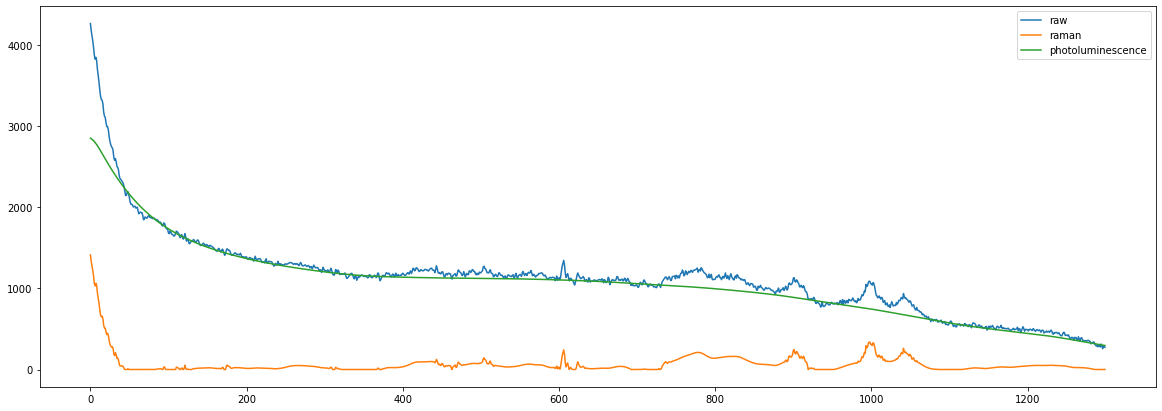

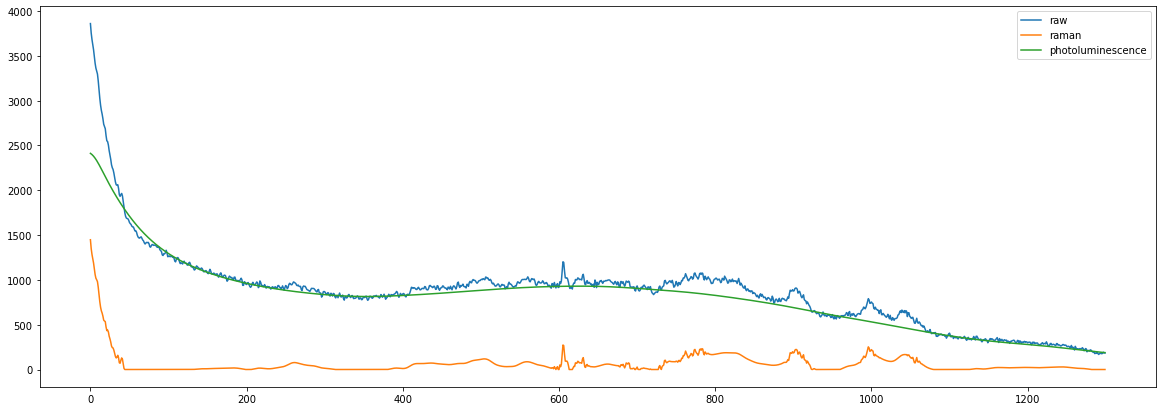

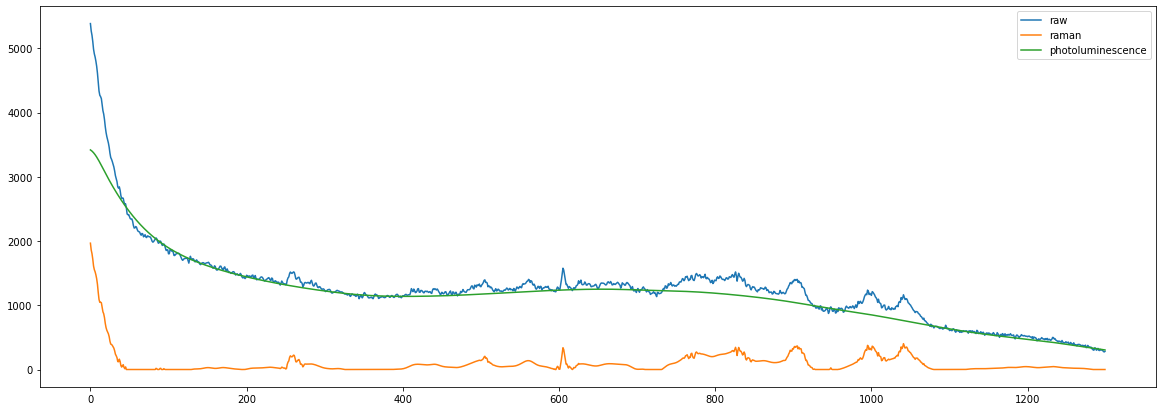

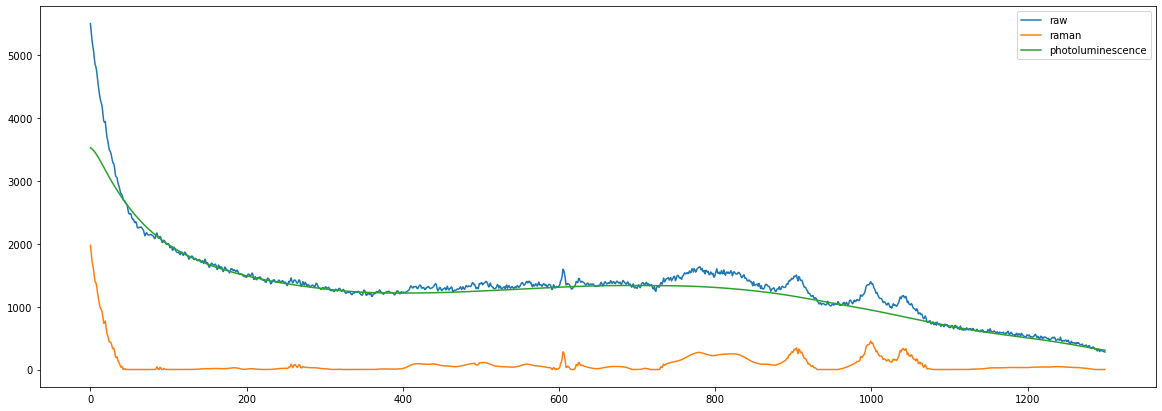

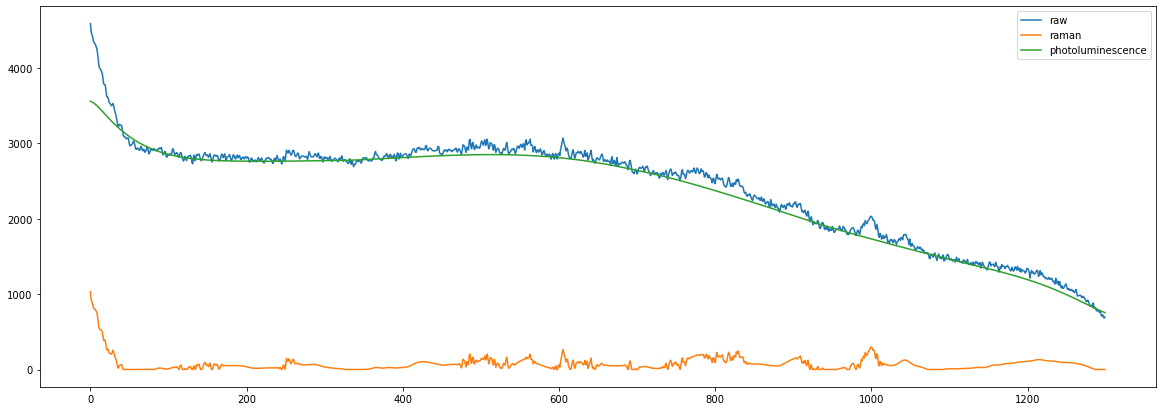

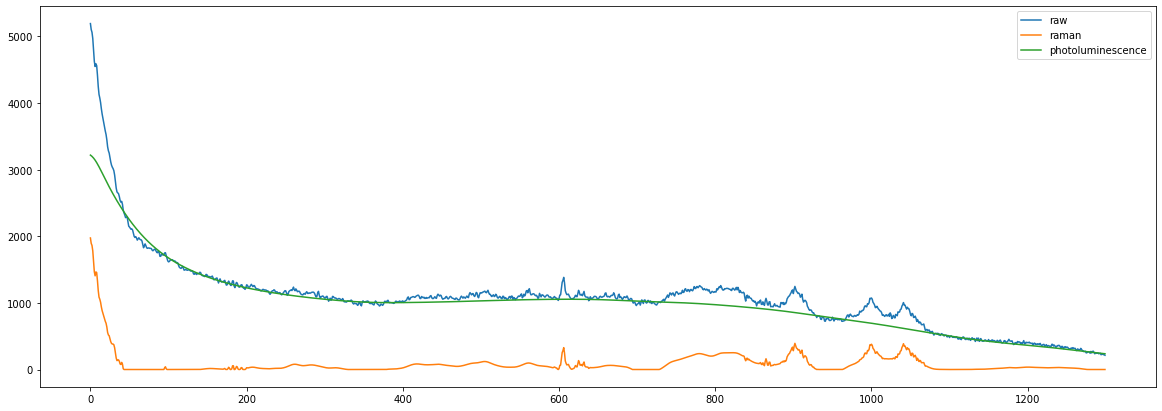

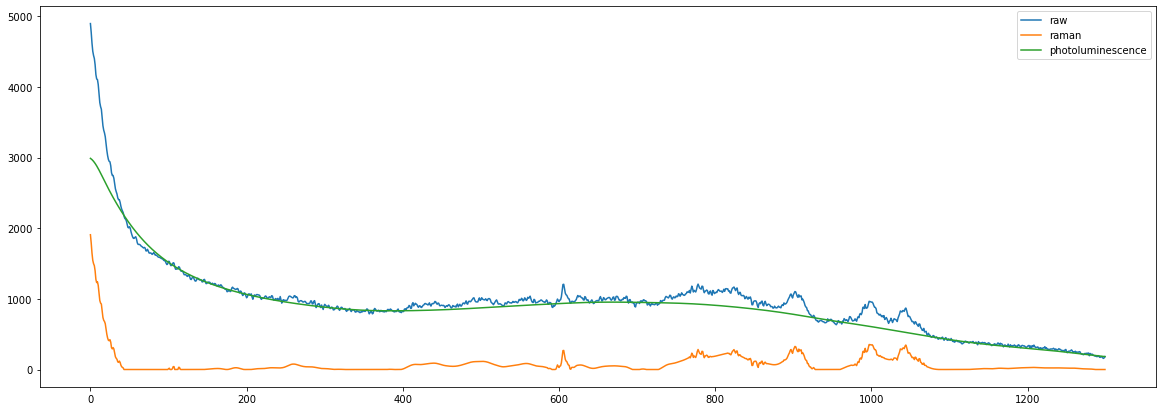

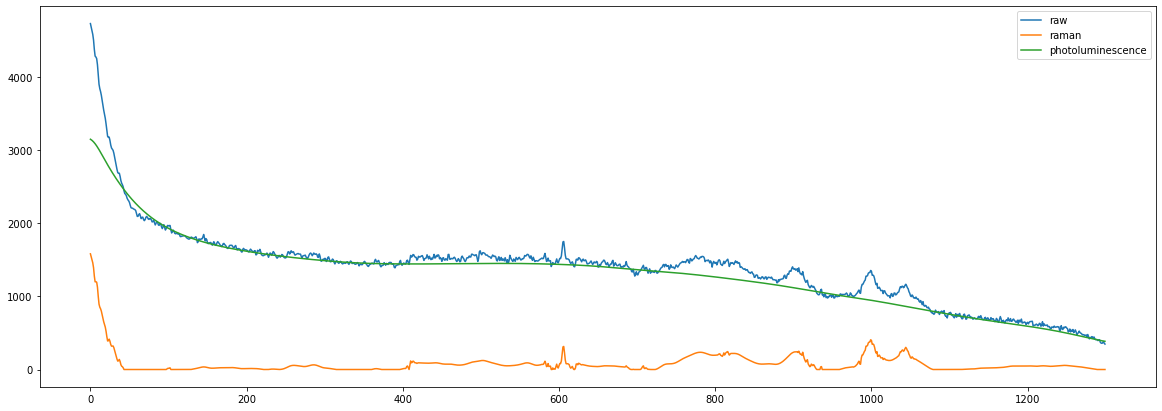

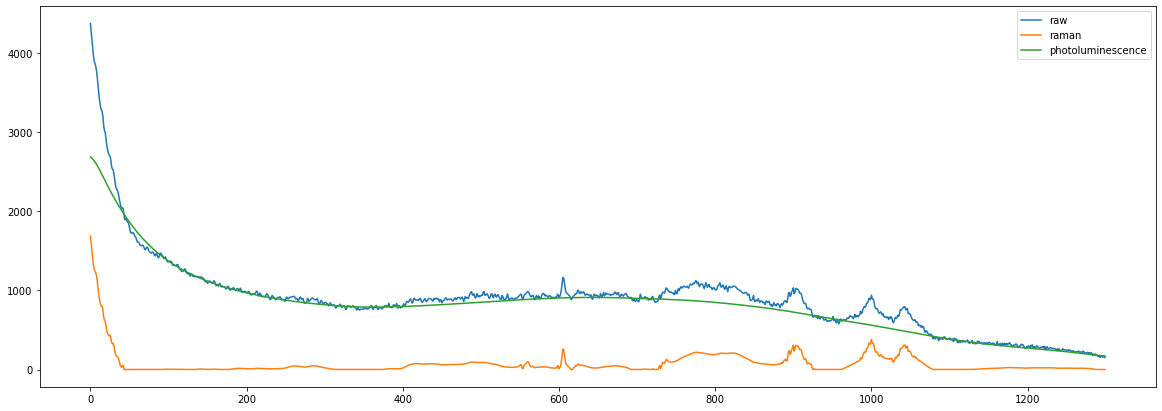

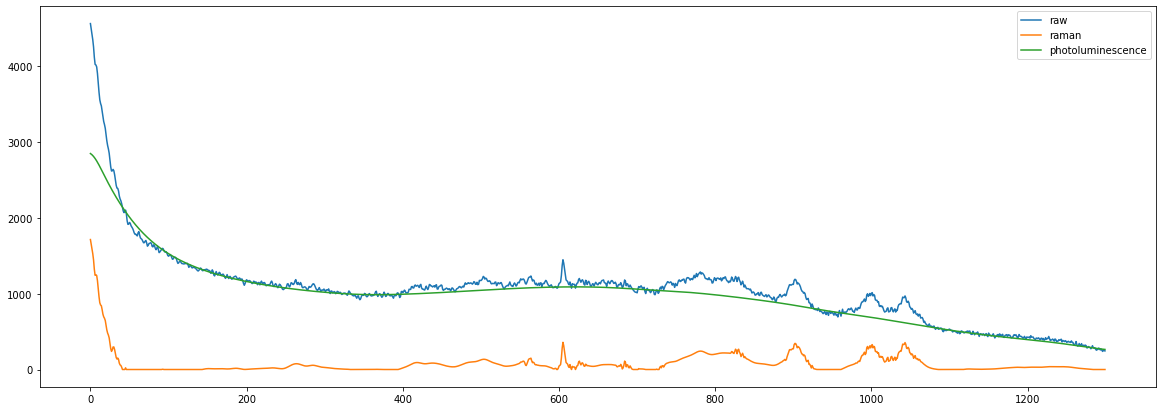

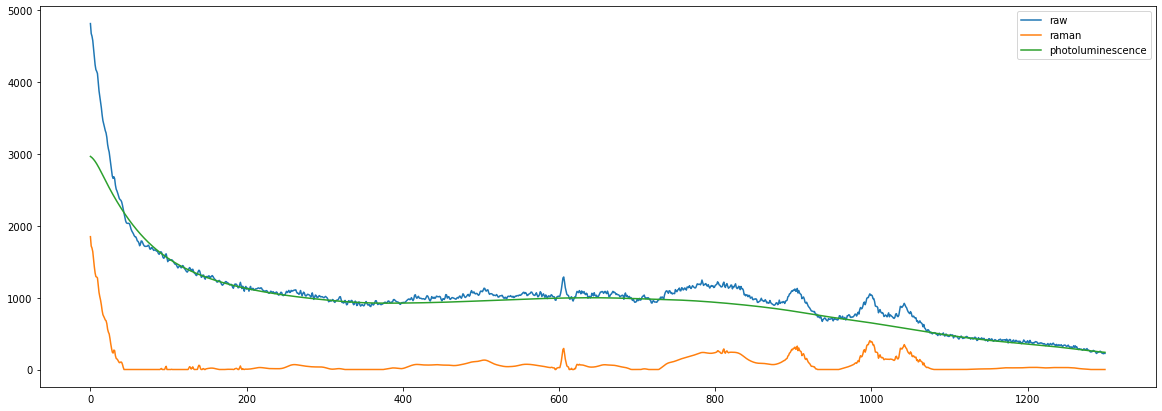

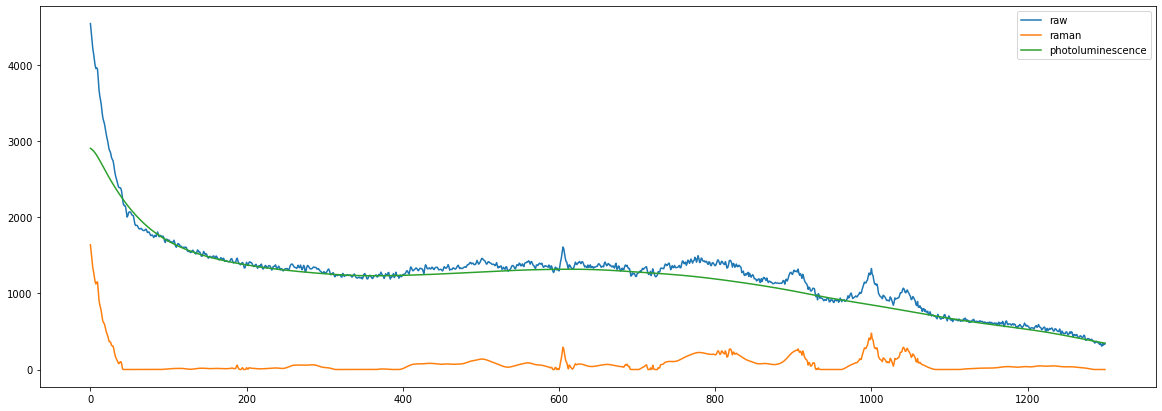

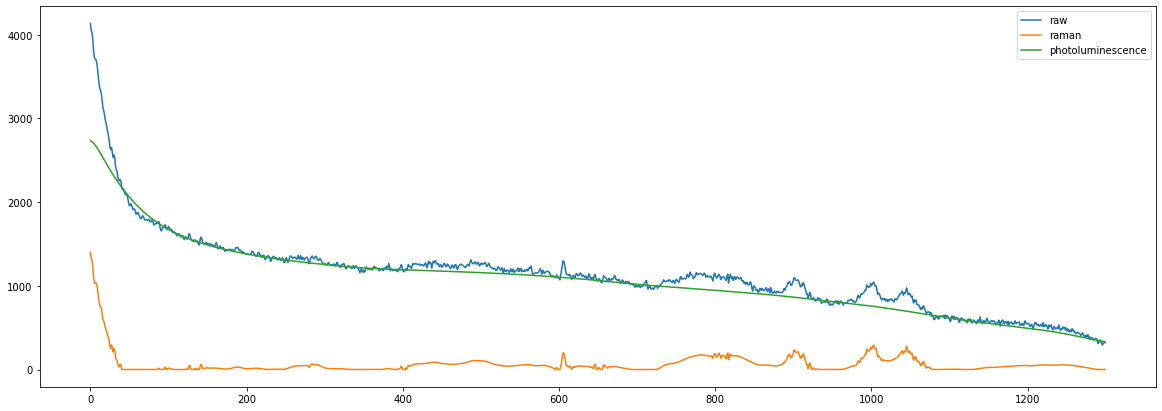

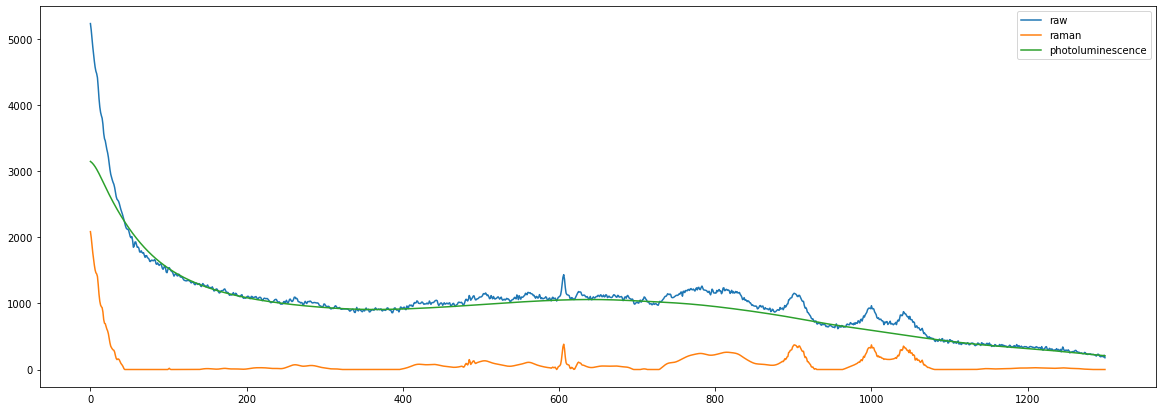

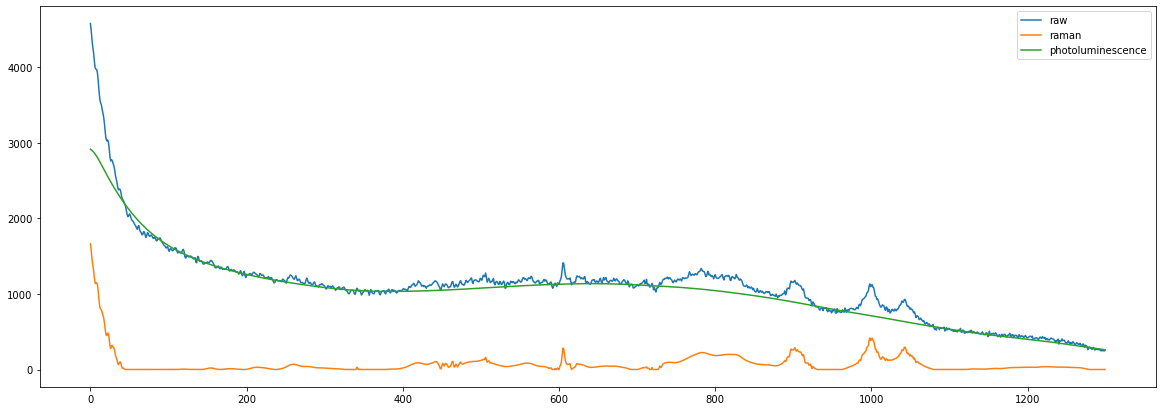

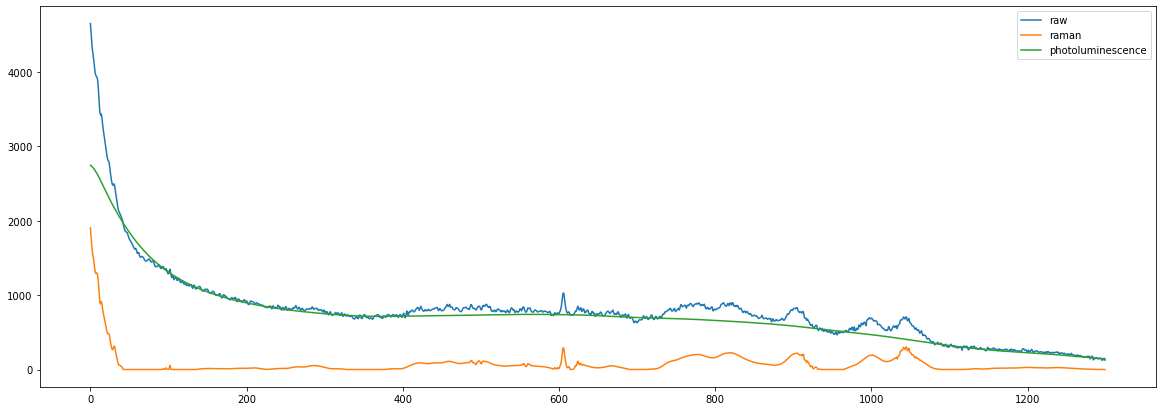

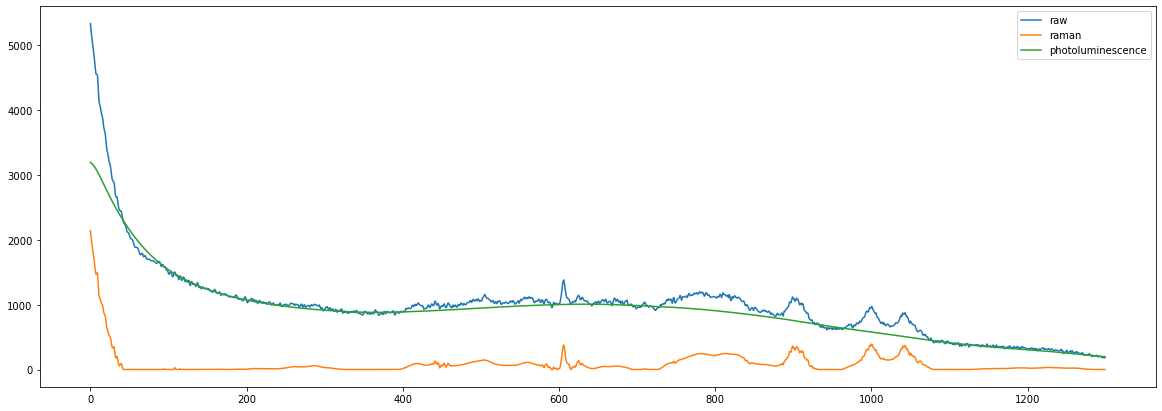

In [54]:
file_location2 = "../data/Raman_Mouse/preprocess/"
shape = data[0].shape

for j, (f, img) in enumerate(zip(filenames, data)):    
    tmp = copy.copy(img.reshape(-1, img.shape[-1]))
    tmp1, tmp2 = GSP.split_Raman_af(GSP.smoothing(tmp, smooth=5, transition=10, spike_width=7), wavenumbers, 9)
    print(img.shape)
    for i in range(0, tmp1.shape[0], 43):
        plt.plot(tmp[i], label='raw')
        plt.plot(tmp1[i], label='raman')
        plt.plot(tmp2[i], label='photoluminescence')
#         plt.plot(tmp[i]-tmp1[i]-tmp2[i], label='error')
        plt.legend()
        plt.show()
    break
    
    
#     np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_raman', tmp1.reshape(shape))
#     np.save(f'{file_location2}{f.split("/")[-1].split(".")[0]}_photoluminescence', tmp2.reshape(shape))
    print(f"image: {f} is done.")
    

In [5]:
# np.save(f'{file_location2}Wavenumbers', wavenumbers)  
# np.save(f'{file_location2}FileNames', filenames)  